<a href="https://colab.research.google.com/github/Wewitas/Python/blob/main/IMB3_DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization with Python

## Módulo 1 - Introduction to visualization tools

 #### Introduction to Data Visualization (4:36)

La visualización de datos es una forma de representar datos complejos de manera gráfica y fácil de entender. Resulta útil en:
- Análisis exploratorios de los datos
- Comunicar datos de forma clara
- Compartir la representación imparcial de datos (divulgación)
- Respaldar recomendaciones o decisiones

Cuando generamos representaciones visuales, debemos siempre recordar:
- Menos es más atractivo
- Menos es más efectivo
- Menos es más impactante

Es decir, busquemos solo apoyar el mensaje que deseamos transmitir y nos distraer de él, por ejemplo:

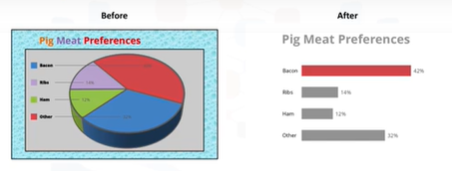

Observamos que se han eliminado todos los elementos extras que no añadian información, pero sí generaban distracción. Incluso se cambió el tipo de gráfico, pues en el curso se comenta que la gráfica de pastel es relevante solo en circunstancias muy particulares.

Es posible entender la misma información en ambas gráficas, pero de forma más sencilla en la segunda, donde además resaltamos la información más relevante.

Este tipo de temas son tratados en:

www.darkhorseanalytics.com

donde a través de ejemplos se respaldan las premisas respecto a que menos es mejor en términos de visualización.

#### Introduction to Matplotlib (6:26)

**Historia**

Matplotlob. Es una muy usada librería para la visualización de datos en Python, creada por John Hunter (1968-2012), quien fue un neurobiólogo y parte de un equipo de investigación que trabajaba analizando electrocardiografías, sin embargo, el software que utilizaban requería licencia y al solo contar con una, debían tomar turnos. Por tanto, debido a las limitaciones, John lo reemplazo con una versión basada en MATLAB que pudiera utilizar cualquiera.

Originalmente desarrollado para visualziar EEG/ECoG y posee una interfaz de secuencias de comandos análoga a MATLAB.

**Arquitectura**

Cuenta con tres capas principales:
1. Back-end layer. Tiene tres clases de interfaz abstractas incorporadas
- FigureCanvas: abarca el área sobre la que se dibuja la figura
- Renderer: Sabe cómo dibujar en la anterior
- Event: Maneja las entradas del usuario
2. Artist layer. Posee un objeto principal, que es el artista y es el cual sabe cómo usar el renderizador para dibujar en canvas. Todo lo que vemos en una figura de Matplotlib es una instancia del artista (tpitulo, líneas, etiquetas en los ejes, imagenes). A su vez hay dos tipos de objetos Artist:
- Primitivo: Líneas 2D, rectángulos, círculos y texto
- Compuesto: Axis, ticks, axes y figura

Cada artista compuesto puede contener otro artista compuesto, como también artista primitivo
3. Scripting layer. Se puede entender como la interfaz de Matplotlib.pyplot, que automatiza el proceso de definir el canvas y la instancia artista para la figura, como conectarlas

Para generar  un histograma de ciertos datos usando la capa artista (artist layer):

Importamos todo lo necesario de Matplotlib
```
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig=Figure()
canvas=FigureCanvas(fig)
```
Creamos un arreglo de números:
```
import numpy as np
x=np.random.randn(10000)
```
Creamos el axes artista (contenedor). El subplot proviene de Matlab, donde se crearía una malla con una fila y una columna y se usa la primera celda en ella para la ubicación del axes
```
ax=fig.add_subplot(111)
```
Se manda llamar el método axes hist para generar el histograma

hist crea una secuencia de rectángulo artistas para cada barra de histograma y la añade al contenedor axes. El 100 hace referencia al número de bins.
```
ax.hist(x,100)
```
Se decora la gráfica
```
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.png')
```


Generar el mismo gráfico anterior usando la capa Scripting
```
import matplotlib.pyplot as plt
import numpy as np

x=np.random.randn(10000)
plt.title('Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()
plt.show()
```

Observamos que todo está relacionado con la interfaz pyplot



Artist layer

In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

x=np.random.randn(10000)

fig=Figure()
canvas=FigureCanvas(fig)
ax=fig.add_subplot(111)
ax.hist(x,100)
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')
fig.savefig('matplotlib_histogram.png')
#La imagen que se genera se guarda en los archivos, a continuación se anexa como texto

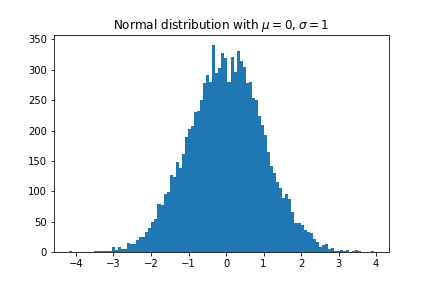

Scripting layer

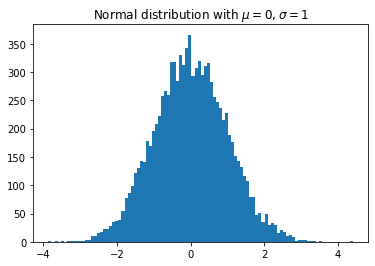

In [ ]:
import matplotlib.pyplot as plt

y=np.random.randn(10000)
plt.hist(y,100)
plt.title('Normal distribution with $\mu=0, \sigma=1$')
plt.savefig('matplotlib_histogram.png')
plt.show()

#### Basic Plotting with Matplotlib (4:39)

Matplotlib es una biblioteca de visualización de datos bien establecida, compatible con diferentes entornos, como scripts de Python, iPython shell, servidores de aplicaciones web, kits de herramientas de interfaz gráfica y Jupyter.

Juypyter notebooks es una aplicación web de código abierto que permite crear y compartir documentos con visualizaciones de código y texto explicativo.

Graficando un punto en 7(x),3(y) con un marcados circular

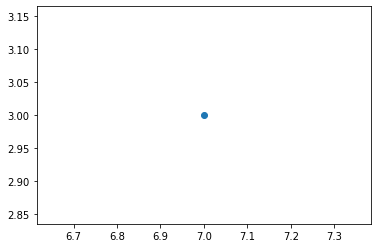

In [ ]:
plt.plot(7,3,'o')
plt.show()

Si la gráfica imprime en una nueva ventana, se puede forzar el gráfico dentro del navegador usando una 'función mágica', la cual inicia con %
```
%matplotlib inline
```
Una limitación del backend es que no podemos modificar la figura una vez que fue renderizada, es decir, ya no podrías añadir un título o etiqueta, por ejemplo. Entonces necesitariamos generar una gráfica nueva y añadir nuestras modificaciones antes de llamar a la función show()





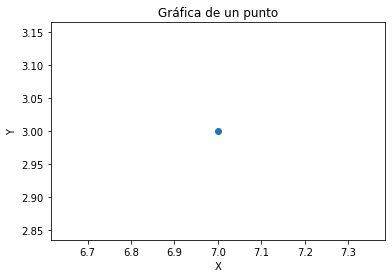

In [ ]:
plt.plot(7,3,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfica de un punto')

plt.show()

Un backend que supera tal limitación es el de cuaderno (notebook), con el cual, si se llama a una función plt, comprueba primero si un existe una figura activa, y cualquier modificación se añadirá ahí. Si no hay una figura existente, creará una. Es decir, no necesitamos crear una gráfica nueva para modificar la anterior.

Text(0.5, 1.0, 'Gráfica de dos puntos')

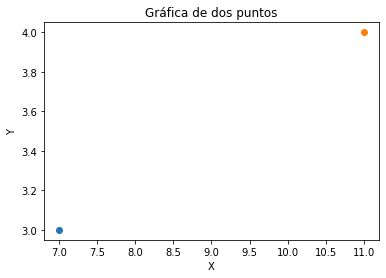

In [ ]:
plt.plot(7,3,'o')
plt.plot(11,4,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfica de dos puntos')

Finalmente, otra aspecto conveniente de Matplotlib es que pandas funciona con ella (tiene una implementación incorporada). Por lo tanto, graficar en pandas es igual de sencillo que con la scripting layer.

In [ ]:
import pandas as pd

#Creamos un dataframe
datos={'India':[7000,8800,7600,8100,6500,7200,7400,8000,8100,8700],'China':[5000,6000,6600,2000,3450,2500,3000,3100,5700,6200]}
años_idx=np.arange(1980,1990)
df=pd.DataFrame(datos, index=años_idx)
df

India  China
1980   7000   5000
1981   8800   6000
1982   7600   6600
1983   8100   2000
1984   6500   3450
1985   7200   2500
1986   7400   3000
1987   8000   3100
1988   8100   5700
1989   8700   6200

Graficamos los datos contenidos en el dataframe con una simple línea de código

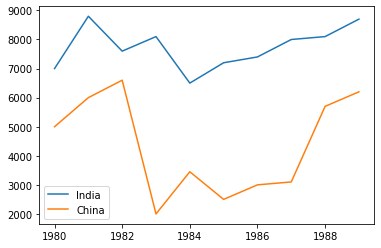

In [ ]:
df.plot(kind='line')

Creando un histograma del dataframe para ambas variables

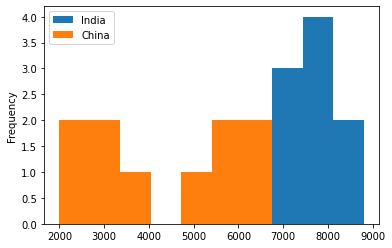

In [ ]:
df.plot(kind='hist')

Creando un histograma del dataframe para una de las variables

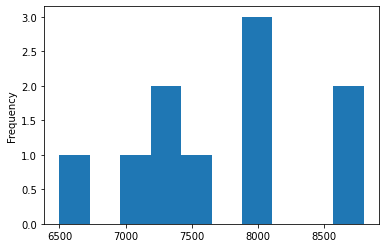

In [ ]:
df['India'].plot(kind='hist')

#### Dataset on Immigration to Canada (2:43)

Previo a crear visualizaciones, necesitamos datos. Se trabajará con pandas para analizar los datos (importarlos en un dataframe). Para ello:
```
import numpy as np #computación científica
import pandas as pd #Estructura de datos primaria
from __feature__ import print_function #Compatibilidad con python 2
```
De igual forma se añadirá la librería que nos permite extraer datos de las hojas de Excel
```
!pip install xird
```
Leemos el excel y lo guardamos como df
```
df=pd.read_excel('path', sheet_name='Nombre', skiprows=range(val), skipfooter=val)
```
donde:
- skiprows. Salta x número de filas al inicio de la hoja (por si hay, por ejemplo, algún logo o descripción de la organización)
- skipfooter. Filas que omitir al final





In [ ]:
#Importamos las librerías
import numpy as np
import pandas as pd

In [ ]:
#Leemos los datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.head(3)

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Immigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Immigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   

   DEV             DevName  1980  ...  2004  2005  2006  2007  2008  2009  \
0  902  Developing regions    16  ...  2978  3436  3009  2652  2111  1746   
1  901   Developed regions     1  ...  1450  1223   856   702   560   716   
2  902  Developing regions    80  ...  3616  3626  4807  3623  4005  5393   

   2010  2011  2012  2013  
0  1758  2203  2635  2004  
1   561   539   620   603  
2  4752  4325  3774  4331  

[3 rows x 43 columns]

#### Line Plots (3:41)

**Gráfico de línea (line plot).** Muestra información como una serie de puntos llamados 'marcadores', conectador por segmentos de líneas rectas. Son útiles para datos continuos y su visualización en periodos de tiempo.

*axis=0 -- columnas*

*axis=1 -- filas*

In [ ]:
#Preparamos los datos
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
df.head(3)

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Immigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Immigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   

   DEV             DevName  1980  ...  2005  2006  2007  2008  2009  2010  \
0  902  Developing regions    16  ...  3436  3009  2652  2111  1746  1758   
1  901   Developed regions     1  ...  1223   856   702   560   716   561   
2  902  Developing regions    80  ...  3626  4807  3623  4005  5393  4752   

   2011  2012  2013  Total  
0  2203  2635  2004  56635  
1   539   620   603  15096  
2  4325  3774  4331  65108  

[3 rows x 44 columns]

In [ ]:
#Renombramos las filas de manera más representativa
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index([     'Type',  'Coverage',   'Country',      'AREA', 'Continent',
             'REG',    'Region',       'DEV',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013,     'Total'],
      dtype='object')

In [ ]:
#Cambiamos los índices en las filas para que sean los países
df.set_index('Country', inplace=True)
df.head(2)

Type    Coverage  AREA Continent   REG           Region  \
Country                                                                      
Afghanistan  Immigrants  Foreigners   935      Asia  5501    Southern Asia   
Albania      Immigrants  Foreigners   908    Europe   925  Southern Europe   

             DEV             DevName  1980  1981  ...  2005  2006  2007  2008  \
Country                                           ...                           
Afghanistan  902  Developing regions    16    39  ...  3436  3009  2652  2111   
Albania      901   Developed regions     1     0  ...  1223   856   702   560   

             2009  2010  2011  2012  2013  Total  
Country                                           
Afghanistan  1746  1758  2203  2635  2004  56635  
Albania       716   561   539   620   603  15096  

[2 rows x 43 columns]

In [ ]:
#Verificamos los índices
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [ ]:
#Importamos la librería para visualización y su interfaz
import matplotlib as mpl
import matplotlib.pyplot as plt

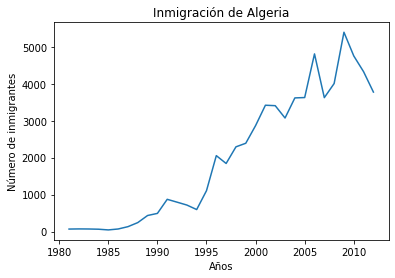

In [ ]:
#Creamos la gráfica de línea
idx=pd.Index(list(df.index))
idxPais=idx.get_loc('Algeria')
#-2 para excluir el total añadido
df.iloc[idxPais, idx1980:-2].plot(kind='line')
plt.title('Inmigración de Algeria')
plt.ylabel('Número de inmigrantes')
plt.xlabel('Años')

plt.show()

### Lab - Introduction to Matplotlib and Line Plots

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Matplotlib version: ', mpl.__version__)
print(plt.style.available)
mpl.style.use(['dark_background']) #estilo opcional para las gráficas

Matplotlib version:  3.2.2
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
import numpy as np
import pandas as pd
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
df.head(3)

Type    Coverage  AREA Continent   REG           Region  \
Country                                                                      
Afghanistan  Immigrants  Foreigners   935      Asia  5501    Southern Asia   
Albania      Immigrants  Foreigners   908    Europe   925  Southern Europe   
Algeria      Immigrants  Foreigners   903    Africa   912  Northern Africa   

             DEV             DevName  1980  1981  ...  2005  2006  2007  2008  \
Country                                           ...                           
Afghanistan  902  Developing regions    16    39  ...  3436  3009  2652  2111   
Albania      901   Developed regions     1     0  ...  1223   856   702   560   
Algeria      902  Developing regions    80    67  ...  3626  4807  3623  4005   

             2009  2010  2011  2012  2013  Total  
Country                                           
Afghanistan  1746  1758  2203  2635  2004  56619  
Albania       716   561   539   620   603  15095  
Algeria      5393  4752  4325  3774  4331  65028  

[3 rows x 43 columns]

In [ ]:
df.columns

Index([     'Type',  'Coverage',      'AREA', 'Continent',       'REG',
          'Region',       'DEV',   'DevName',        1980,        1981,
              1982,        1983,        1984,        1985,        1986,
              1987,        1988,        1989,        1990,        1991,
              1992,        1993,        1994,        1995,        1996,
              1997,        1998,        1999,        2000,        2001,
              2002,        2003,        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,     'Total'],
      dtype='object')

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.

In [ ]:
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
años=list(map(str, range(1980, 2014)))
dfa=dfc.loc[['India', 'China'], años]
dfa

1980  1981  1982  1983  1984  1985  1986   1987   1988   1989  ...  \
Country                                                                 ...   
India    8880  8670  8147  7338  5704  4211  7150  10189  11522  10343  ...   
China    5123  6682  3308  1863  1527  1816  1960   2643   2758   4323  ...   

          2004   2005   2006   2007   2008   2009   2010   2011   2012   2013  
Country                                                                        
India    28235  36210  33848  28742  28261  29456  34235  27509  30933  33087  
China    36619  42584  33518  27642  30037  29622  30391  28502  33024  34129  

[2 rows x 34 columns]

Step 2: Plot graph. We will explicitly specify line plot by passing in kind parameter to plot()

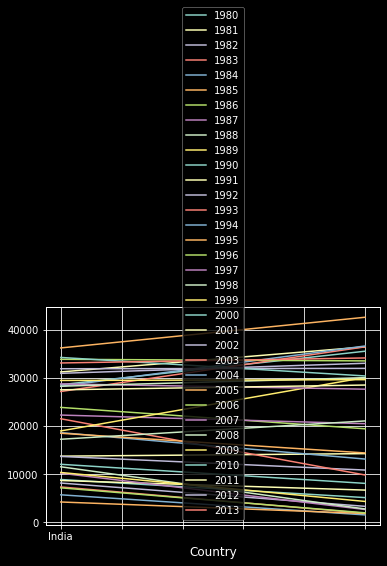

In [ ]:
dfa.plot(kind='line')

That doesn't look right...

Recall that pandas plots the indices on the x-axis and the columns as individual lines on the y-axis. Since df_CI is a dataframe with the country as the index and years as the columns, we must first transpose the dataframe using transpose() method to swap the row and columns.*texto en cursiva*

In [ ]:
dfa=dfa.transpose()
dfa.head()

Country  India  China
1980      8880   5123
1981      8670   6682
1982      8147   3308
1983      7338   1863
1984      5704   1527

pandas will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

Text(0, 0.5, 'Número de inmigrantes')

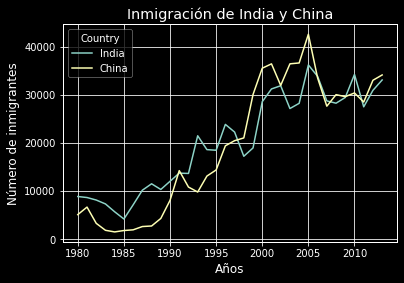

In [ ]:
dfa.plot(kind='line')
plt.title('Inmigración de India y China')
plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Text(0, 0.5, 'Número de inmigrantes')

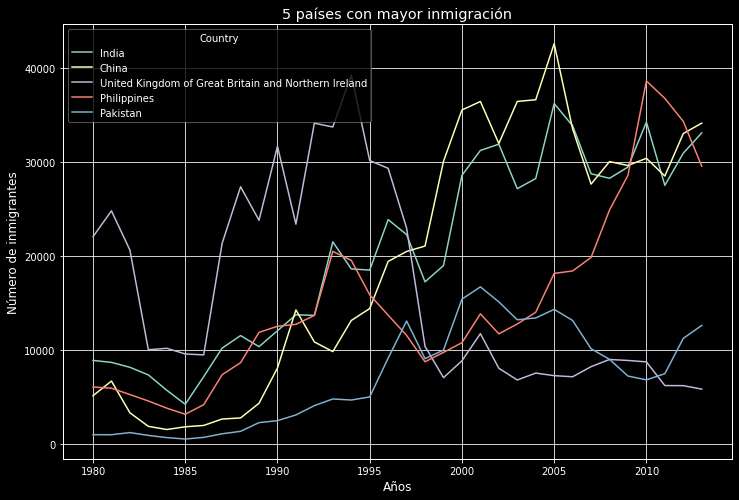

In [ ]:
inplace=True #Salvar los cambios en el df original
dfc.sort_values(by='Total', ascending=False, axis=0, inplace=True)
top5=dfc.head(5)
top5=top5[años].transpose()
top5.plot(kind='line', figsize=(12,8))
top5.index=top5.index.map(int)
plt.title('5 países con mayor inmigración')
plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')

### Review Questions

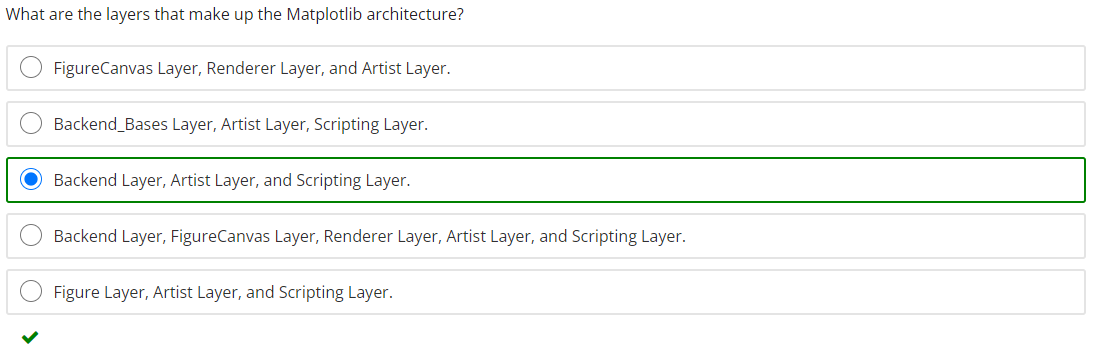

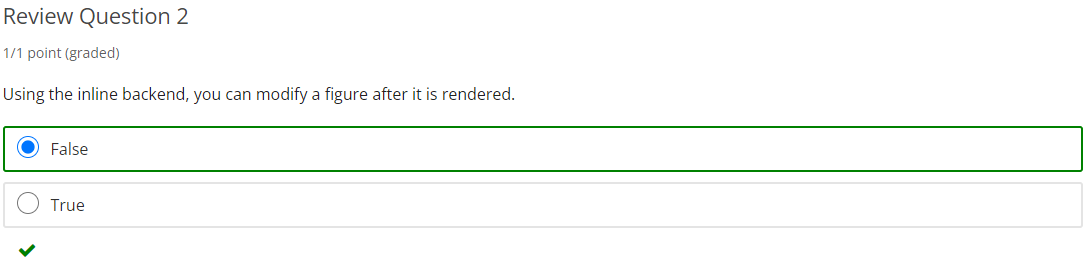

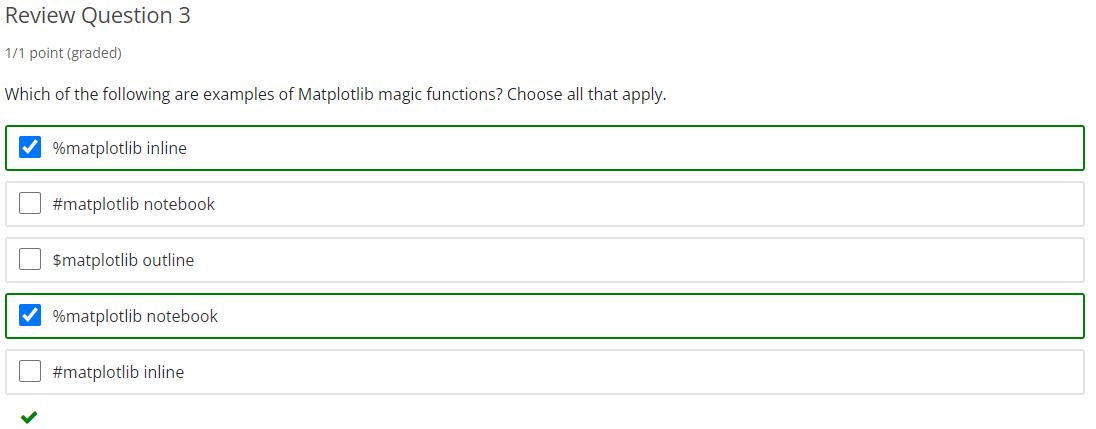

## Módulo 2 - Basic Visualization Tools

### Area Plots (4:45)

**Gráfica de área (area plot/chart/graph).** Es una extensión del gráfico de línea (basada en ella) y es usualmente utilizada cuando deseamos representar totales acumulados, representados por medio de números o porcentaje a través del tiempo (comparar dos o más cantidades).

In [ ]:
#Importar los datos
import numpy as np
import pandas as pd
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
df.head(3)

Type    Coverage  AREA Continent   REG           Region  \
Country                                                                      
Afghanistan  Immigrants  Foreigners   935      Asia  5501    Southern Asia   
Albania      Immigrants  Foreigners   908    Europe   925  Southern Europe   
Algeria      Immigrants  Foreigners   903    Africa   912  Northern Africa   

             DEV             DevName  1980  1981  ...  2005  2006  2007  2008  \
Country                                           ...                           
Afghanistan  902  Developing regions    16    39  ...  3436  3009  2652  2111   
Albania      901   Developed regions     1     0  ...  1223   856   702   560   
Algeria      902  Developing regions    80    67  ...  3626  4807  3623  4005   

             2009  2010  2011  2012  2013  Total  
Country                                           
Afghanistan  1746  1758  2203  2635  2004  56635  
Albania       716   561   539   620   603  15096  
Algeria      5393  4752  4325  3774  4331  65108  

[3 rows x 43 columns]

In [ ]:
#Organizar el df de forma descendente con base en el Total
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [ ]:
#Creamos un nuevo df con los 5 países con el número más alto de
#inmigración respecto a Canada, excluyendo la columna del total
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
años=list(map(str, range(1980,2014))) #años de indexación
#Obtenemos la transpuesta porque Matlplotlib coloca los índices
#en el eje horizontal, que es donde queremos los años
top5=dfc.head()
top5=top5[años].transpose()
top5.head(3)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      

Country  Philippines  United States of America  
1980            6051                      9378  
1981            5921                     10030  
1982            5249                      9074

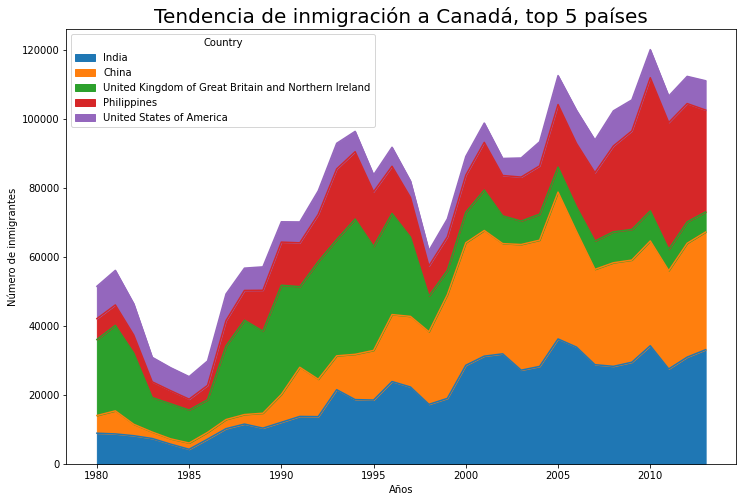

In [ ]:
#Cargamos las librerías
import matplotlib as mpl
import matplotlib.pyplot as plt

#Generamos el gráfico de área
top5.plot(kind='area', figsize=(12,8))
plt.title('Tendencia de inmigración a Canadá, top 5 países', fontsize=20)
plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.show()

#Se genera la gráfica a través del inline backend

### Histograms (4:58)

**Histograma.** Es una forma de representar la frecuencia de la distribución de una variable. Funciona través de particiones de datos numéricos asignados en el conjunto de datos, asignado a cada bin para realizar una cuenta de ellos.

En el eje vertical suele estar la frecuencia de la cantidad de puntos para cada bin.

In [ ]:
#Importación de datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
df.head(3)

Type    Coverage  AREA Continent   REG           Region  \
Country                                                                      
Afghanistan  Immigrants  Foreigners   935      Asia  5501    Southern Asia   
Albania      Immigrants  Foreigners   908    Europe   925  Southern Europe   
Algeria      Immigrants  Foreigners   903    Africa   912  Northern Africa   

             DEV             DevName  1980  1981  ...  2005  2006  2007  2008  \
Country                                           ...                           
Afghanistan  902  Developing regions    16    39  ...  3436  3009  2652  2111   
Albania      901   Developed regions     1     0  ...  1223   856   702   560   
Algeria      902  Developing regions    80    67  ...  3626  4807  3623  4005   

             2009  2010  2011  2012  2013  Total  
Country                                           
Afghanistan  1746  1758  2203  2635  2004  56635  
Albania       716   561   539   620   603  15096  
Algeria      5393  4752  4325  3774  4331  65108  

[3 rows x 43 columns]

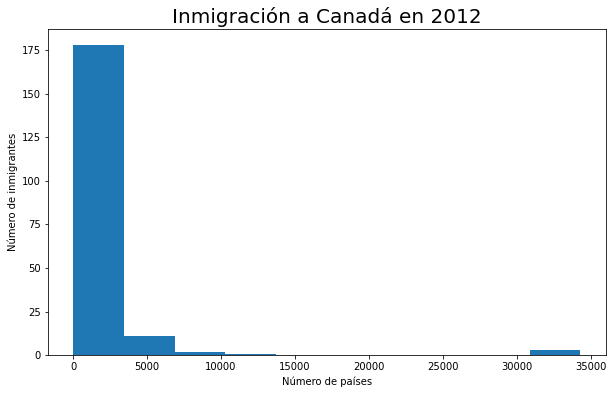

In [ ]:
#Creación del histograma
#Observamos que las barras (bins) no están alineados en las divisiones del eje x
df[2012].plot(kind='hist', figsize=(10,6))
plt.title('Inmigración a Canadá en 2012', fontsize=20)
plt.xlabel('Número de países')
plt.ylabel('Número de inmigrantes')
plt.show()

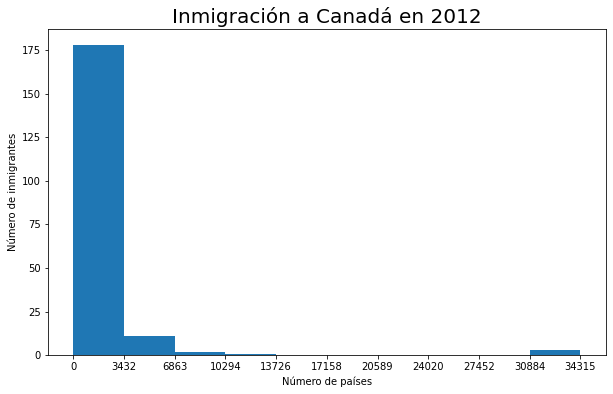

In [ ]:
#Creación del histograma
#Alineamos las barras a las divisiones del eje x
cuenta, bins= np.histogram(df[2012])
df[2012].plot(kind='hist', figsize=(10,6), xticks=bins)
plt.title('Inmigración a Canadá en 2012', fontsize=20)
plt.xlabel('Número de países')
plt.ylabel('Número de inmigrantes')
plt.show()

### Bar Charts (3:30)

**Gráfico de barras.** La longitud de cada barra es proporcional a lo que representa. Suele utilizarse para comparar los valores de una variable en un momento dado.

In [ ]:
#Importación de datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
#Los nombres de las columnas se convierten a texto
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
#Se crea una lista que contiene los índices de los años
años=list(map(str, range(1980, 2014)))
dfc.head(3)

Type    Coverage  AREA Continent   REG           Region  \
Country                                                                      
Afghanistan  Immigrants  Foreigners   935      Asia  5501    Southern Asia   
Albania      Immigrants  Foreigners   908    Europe   925  Southern Europe   
Algeria      Immigrants  Foreigners   903    Africa   912  Northern Africa   

             DEV             DevName  1980  1981  ...  2005  2006  2007  2008  \
Country                                           ...                           
Afghanistan  902  Developing regions    16    39  ...  3436  3009  2652  2111   
Albania      901   Developed regions     1     0  ...  1223   856   702   560   
Algeria      902  Developing regions    80    67  ...  3626  4807  3623  4005   

             2009  2010  2011  2012  2013  Total  
Country                                           
Afghanistan  1746  1758  2203  2635  2004  56635  
Albania       716   561   539   620   603  15096  
Algeria      5393  4752  4325  3774  4331  65108  

[3 rows x 43 columns]

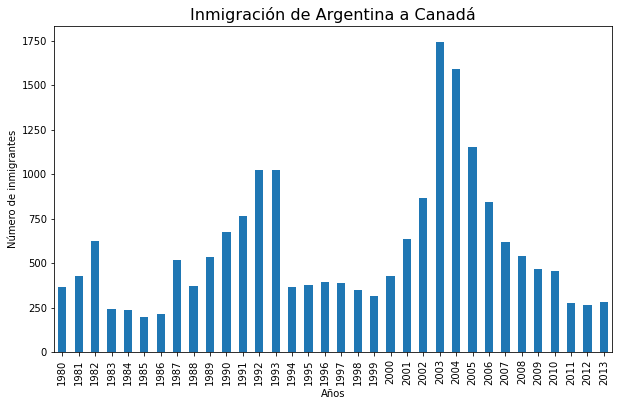

In [ ]:
#Creación del gráfico de barras
df_argentina=dfc.loc['Argentina',años]
df_argentina.plot(kind='bar', figsize=(10,6))
plt.title('Inmigración de Argentina a Canadá', fontsize=16)
plt.xlabel('Años')
plt.ylabel('Número de inmigrantes')
plt.show()

### Lab - Area Plots, Histograms, and Bar Plots

##### Datos

In [ ]:
#Librerías
import pandas as pd
import numpy as np

In [ ]:
#Importación de datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.head(3)

Type    Coverage       OdName  AREA AreaName   REG          RegName  \
0  Immigrants  Foreigners  Afghanistan   935     Asia  5501    Southern Asia   
1  Immigrants  Foreigners      Albania   908   Europe   925  Southern Europe   
2  Immigrants  Foreigners      Algeria   903   Africa   912  Northern Africa   

   DEV             DevName  1980  ...  2004  2005  2006  2007  2008  2009  \
0  902  Developing regions    16  ...  2978  3436  3009  2652  2111  1746   
1  901   Developed regions     1  ...  1450  1223   856   702   560   716   
2  902  Developing regions    80  ...  3616  3626  4807  3623  4005  5393   

   2010  2011  2012  2013  
0  1758  2203  2635  2004  
1   561   539   620   603  
2  4752  4325  3774  4331  

[3 rows x 43 columns]

In [ ]:
#Remover columnas no relevantes
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [ ]:
#Renombrar las columnas
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df.head(3)

Country Continent           Region             DevName  1980  1981  \
0  Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1      Albania    Europe  Southern Europe   Developed regions     1     0   
2      Algeria    Africa  Northern Africa  Developing regions    80    67   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  

[3 rows x 38 columns]

In [ ]:
#Examinar las etiquetas de las columnas, deben ser tipo str para mantener la consistencia
all(isinstance(column, str) for column in df.columns)

False

In [ ]:
#Modificas las etiquetas de las columnas para que sean del tipo str
df.columns = list(map(str, df.columns))
#Comprobamos
all(isinstance(column, str) for column in df.columns)

True

In [ ]:
#Cambiar los índices a los nombres de los países
df.set_index('Country', inplace=True)
df.head(3)

Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2004  2005  2006  2007  2008  2009  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  2978  3436  3009  2652  2111  1746   
Albania         0     0     0     1  ...  1450  1223   856   702   560   716   
Algeria        69    63    44    69  ...  3616  3626  4807  3623  4005  5393   

             2010  2011  2012  2013  
Country                              
Afghanistan  1758  2203  2635  2004  
Albania       561   539   620   603  
Algeria      4752  4325  3774  4331  

[3 rows x 37 columns]

In [ ]:
#Se añade una columna con el total de migrantes
df['Total']=df.sum(axis=1)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   
Albania         0     0     0     1  ...  1223   856   702   560   716   561   
Algeria        69    63    44    69  ...  3626  4807  3623  4005  5393  4752   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  58639  
Albania       539   620   603  15699  
Algeria      4325  3774  4331  69439  

[3 rows x 38 columns]

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')  #estilo opcional

print('Versión Matplotlib: ', mpl.__version__) # >= 2.0.0

Versión Matplotlib:  3.2.2


In [ ]:
years = list(map(str, range(1980, 2014)))

#Creación del top 5 de países con mayor migración a Canadá
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head(3)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      

Country  Philippines  Pakistan  
1980            6051       978  
1981            5921       972  
1982            5249      1201

##### Gráfico de área

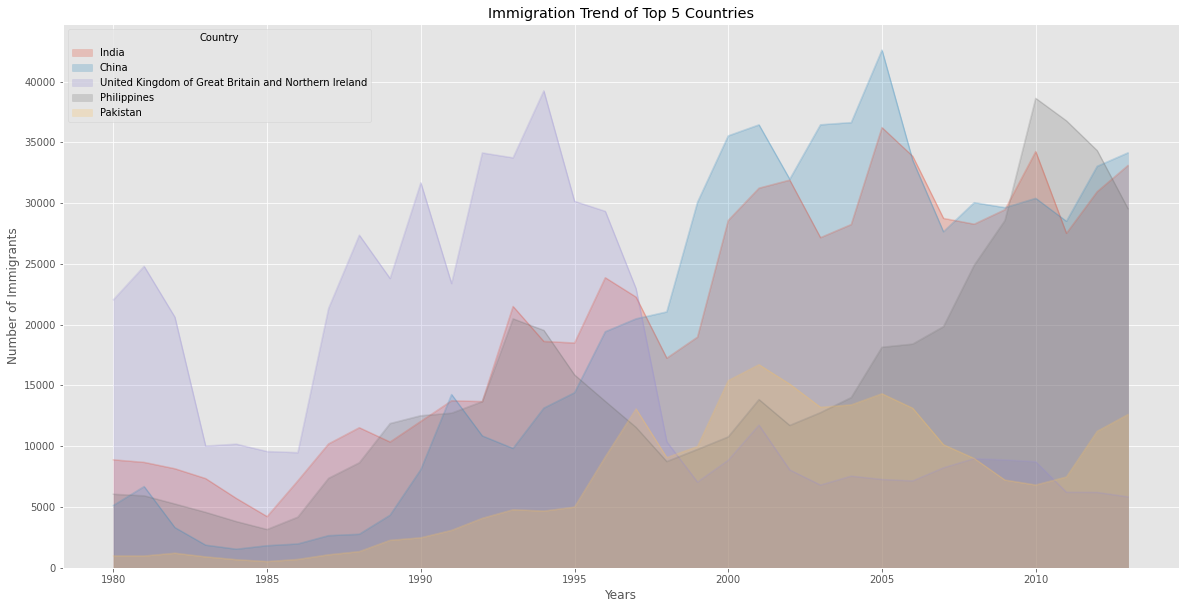

In [ ]:
df_top5.plot(kind='area',
             alpha=0.25,  #0 - 1, default value alpha = 0.5 (transparencia)
             stacked=False, #gráfico no apilado, NaN=0
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

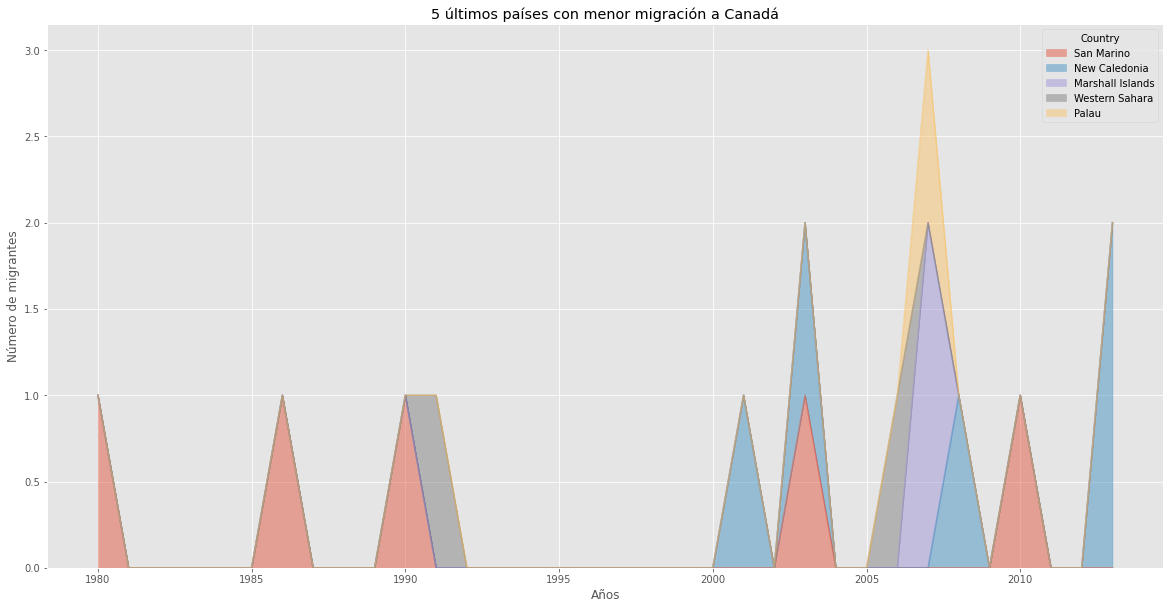

In [ ]:
ultimos5=df.tail(5)
ultimos5=ultimos5[years].transpose()
ultimos5.head()
ultimos5.index=ultimos5.index.map(int) # let's change the index values of ultimos5 to type integer for plotting
ultimos5.plot(kind='area', alpha=0.45, figsize=(20, 10))

plt.title('5 últimos países con menor migración a Canadá')
plt.ylabel('Número de migrantes')
plt.xlabel('Años')
plt.show()

***Two types of plotting (tipos de graficado).*** As we discussed in the video lectures, there are two styles/options of plotting with matplotlib， plotting using the Artist layer and plotting using the scripting layer:

- **Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'**

You can use plt i.e. matplotlib.pyplot and add more elements by calling different methods procedurally; for example, plt.title(...) to add title or plt.xlabel(...) to add label to the x-axis.
```
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

- **Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred)**

You can use an Axes instance of your current plot and store it in a variable (eg. ax). You can add more elements by calling methods with a little change in syntax (by adding "set_" to the previous methods). For example, use ax.set_title() instead of plt.title() to add title, or ax.set_xlabel() instead of plt.xlabel() to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.
```
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')
```





**Question:** Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

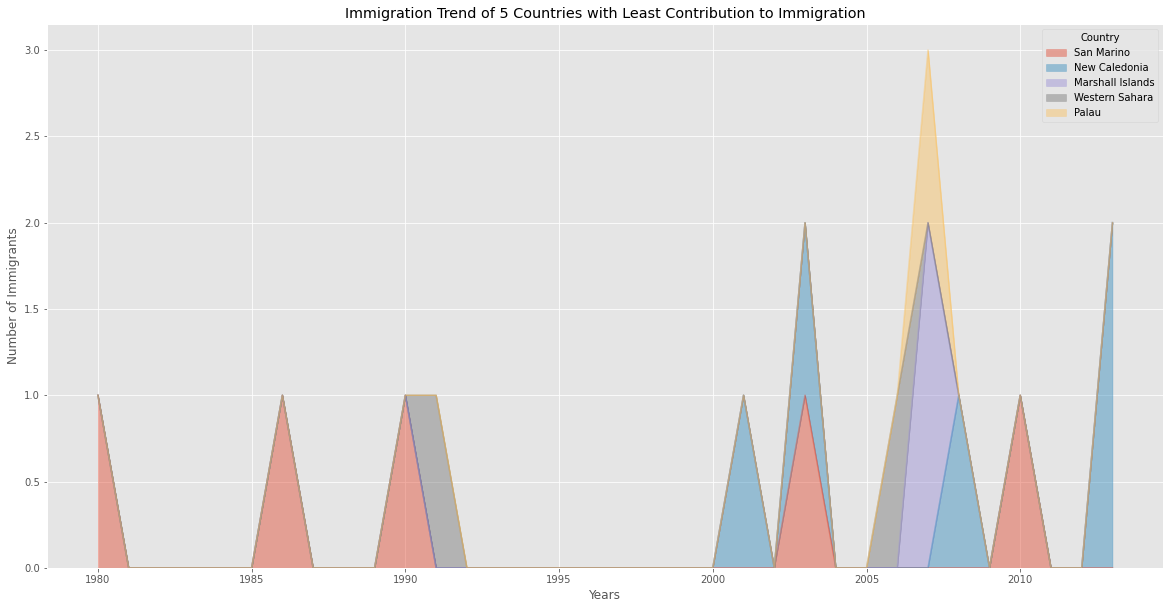

In [ ]:
df_least5=df.tail(5)
df_least5=df_least5[years].transpose()
df_least5.head()
df_least5.index=df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

**Question:** Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

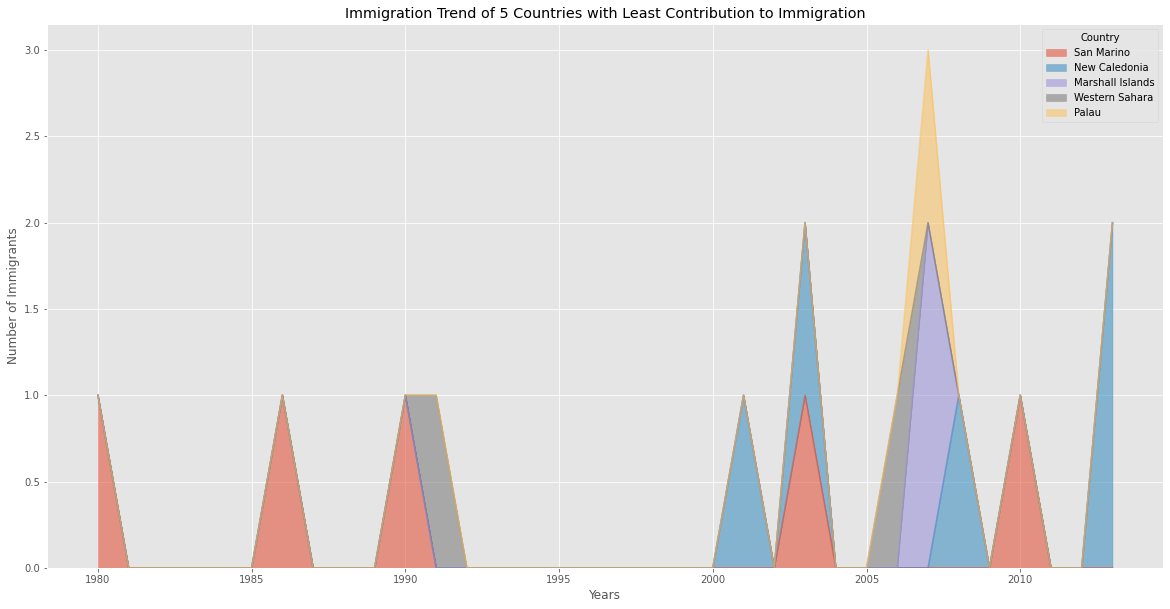

In [ ]:
df_least5=df.tail(5)
df_least5=df_least5[years].transpose()
df_least5.head()
df_least5.index=df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
ax=df_least5.plot(kind='area', alpha=0.55, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

In [ ]:
#Visualizar el contenido de cierto año
df['2012'].head()

Country
India                                                   30933
China                                                   33024
United Kingdom of Great Britain and Northern Ireland     6195
Philippines                                             34315
Pakistan                                                11227
Name: 2012, dtype: int64

##### Histograma

In [ ]:
#np.histogram para ajustar los bins del histograma
count, bin_edges=np.histogram(df['2012'])
print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   2   1   0   0   0   0   0   3]
[    0.   3431.5  6863.  10294.5 13726.  17157.5 20589.  24020.5 27452.
 30883.5 34315. ]


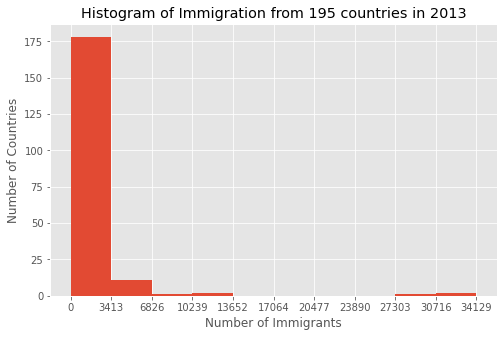

In [ ]:
#Ajustar los bins como intervalos en el histograma
count, bin_edges=np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

In [ ]:
#Las columnas son los datos que se grafican en el histograma
#donde los índices corresponderán al eje x (horizontal)
df.loc[['Denmark', 'Norway', 'Sweden'], years]

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]

In [ ]:
#Por lo que necesitariamos la transpuesta del df anterior
#para visualizar correctamente su histograma
df_t=df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128
1985          73      54     158
1986          93      56     187
1987         109      80     198
1988         129      73     171
1989         129      76     182
1990         118      83     130
1991         111     103     167
1992         158      74     179
1993         186      92     203
1994          93      60     192
1995         111      65     176
1996          70      70     161
1997          83     104     151
1998          63      31     123
1999          81      36     170
2000          93      56     138
2001          81      78     184
2002          70      74     149
2003          89      77     161
2004          89      73     129
2005          62      57     205
2006         101      53     139
2007          97      73     193
2008         108      66     165
2009          81      75     167
2010          92      46     159
2011          93      49     134
2012          94      53     140
2013          81      59     140

Modificaciones visuales:
- increase the bin size to 15 by passing in bins parameter;
- set transparency to 60% by passing in alpha parameter;
- label the x-axis by passing in x-label parameter;
- change the colors of the plots by passing in color parameter

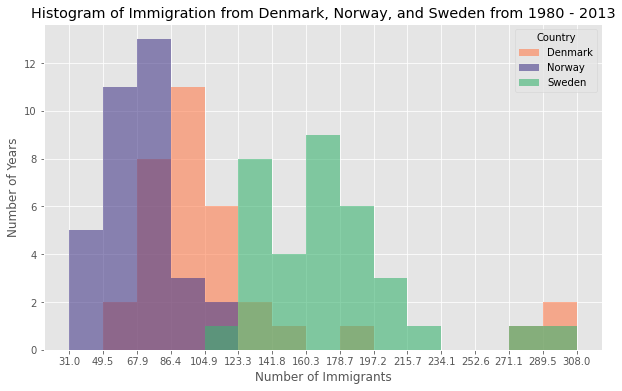

In [ ]:
#Ajustando los intervalos en x
count, bin_edges=np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
#Obteniendo los posibles colores para Matlplotlib
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


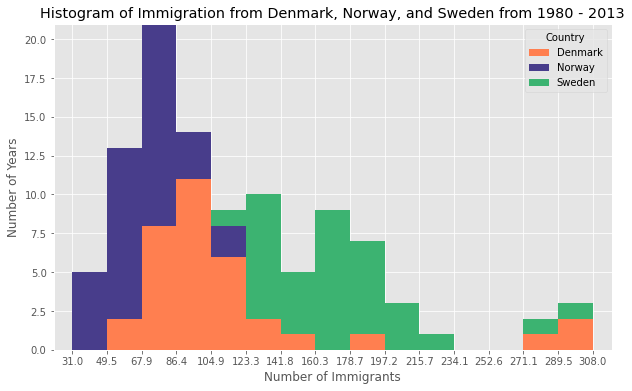

In [ ]:
#Alternativamente podemos apilar las gráficas (stacked)
count, bin_edges = np.histogram(df_t, 15)
xmin=bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax=bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question:** Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

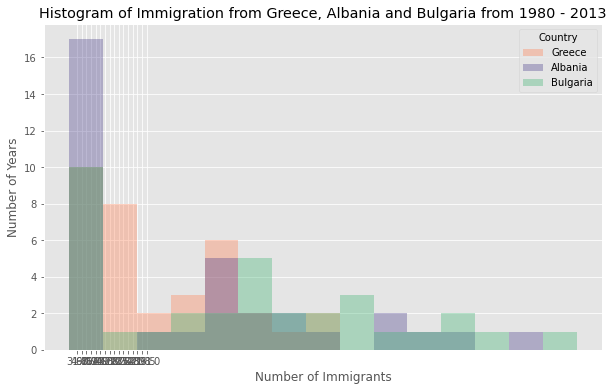

In [ ]:
df_T=df.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
cuenta, binss=np.histogram(df_t, 15)

# un-stacked histogram
df_T.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=binss,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Greece, Albania and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

##### Gráfico de barras

To create a bar plot, we can pass one of two arguments via kind parameter in plot():

- kind=bar creates a vertical bar plot
- kind=barh creates a horizontal bar plot

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

- **s:** str, the text of annotation.
- **xy:** Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- **xytext:** Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- **xycoords:** The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- **arrowprops:** Takes a dictionary of properties to draw the arrow:
- **arrowstyle:** Specifies the arrow style, '->' is standard arrow.
- **connectionstyle:** Specifies the connection type. arc3 is a straight line.
- **color:** Specifies color of arrow.
- **lw:** Specifies the line width.

http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate

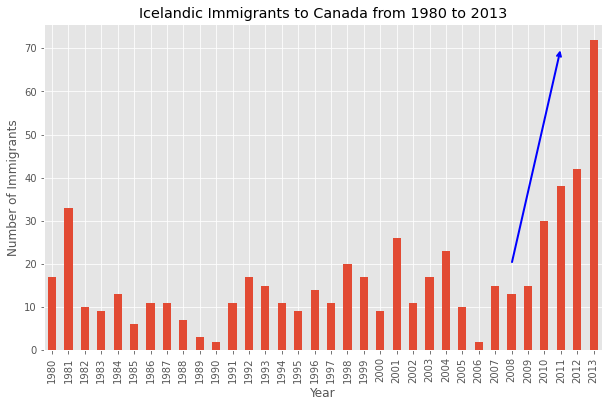

In [ ]:
df_iceland=df.loc['Iceland', years]

df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(31, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:

- **rotation:** rotation angle of text in degrees (counter clockwise)
- **va:** vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- **ha:** horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

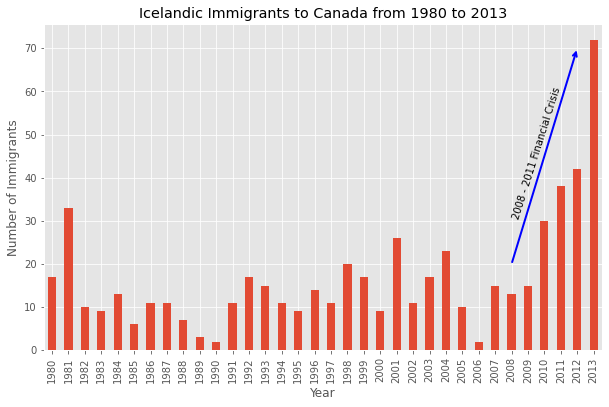

In [ ]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

**Question:** Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
df.sort_values(by='Total', ascending=True, inplace=True)
df15=df.tail(15)
df15

Continent  \
Country                                                                               
Romania                                                                      Europe   
Viet Nam                                                                       Asia   
Jamaica                                             Latin America and the Caribbean   
France                                                                       Europe   
Lebanon                                                                        Asia   
Poland                                                                       Europe   
Republic of Korea                                                              Asia   
Sri Lanka                                                                      Asia   
Iran (Islamic Republic of)                                                     Asia   
United States of America                                           Northern America   
Pakistan                                                                       Asia   
Philippines                                                                    Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
China                                                                          Asia   
India                                                                          Asia   

                                                                Region  \
Country                                                                  
Romania                                                 Eastern Europe   
Viet Nam                                            South-Eastern Asia   
Jamaica                                                      Caribbean   
France                                                  Western Europe   
Lebanon                                                   Western Asia   
Poland                                                  Eastern Europe   
Republic of Korea                                         Eastern Asia   
Sri Lanka                                                Southern Asia   
Iran (Islamic Republic of)                               Southern Asia   
United States of America                              Northern America   
Pakistan                                                 Southern Asia   
Philippines                                         South-Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
China                                                     Eastern Asia   
India                                                    Southern Asia   

                                                               DevName   1980  \
Country                                                                         
Romania                                              Developed regions    375   
Viet Nam                                            Developing regions   1191   
Jamaica                                             Developing regions   3198   
France                                               Developed regions   1729   
Lebanon                                             Developing regions   1409   
Poland                                               Developed regions    863   
Republic of Korea                                   Developing regions   1011   
Sri Lanka                                           Developing regions    185   
Iran (Islamic Republic of)                          Developing regions   1172   
United States of America                             Developed regions   9378   
Pakistan                                            Developing regions    978   
Philippines                                         Developing regions   6051   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
China                                               Developing regions   5123   
India                                  

Step 2: Plot data:

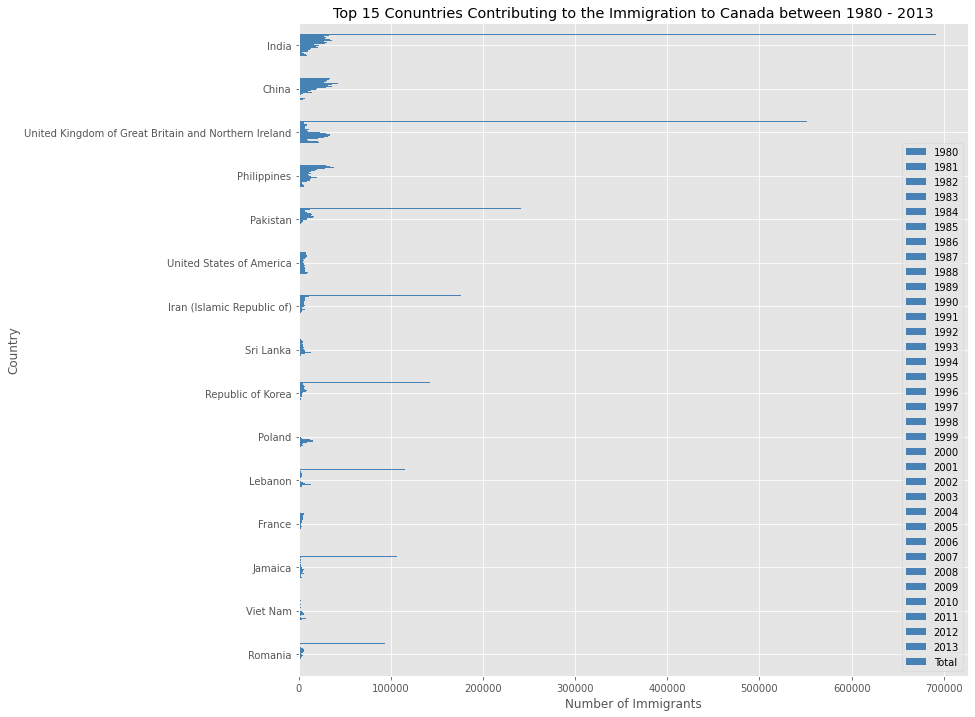

In [ ]:
df15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# for index, value in enumerate(df15):
#     label = format(int(value), ',') # format int with commas
#     plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()

#### Review Questions

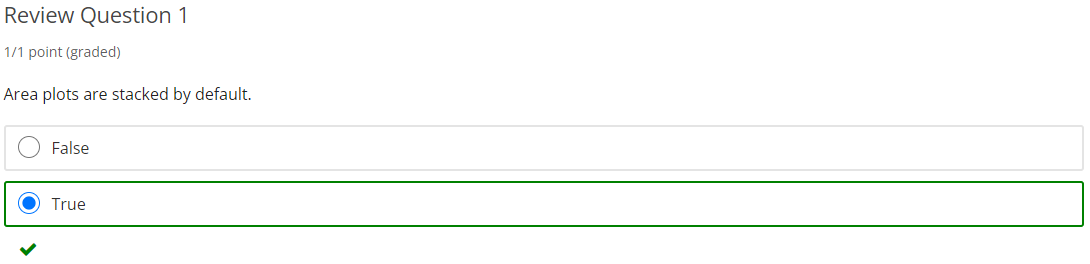

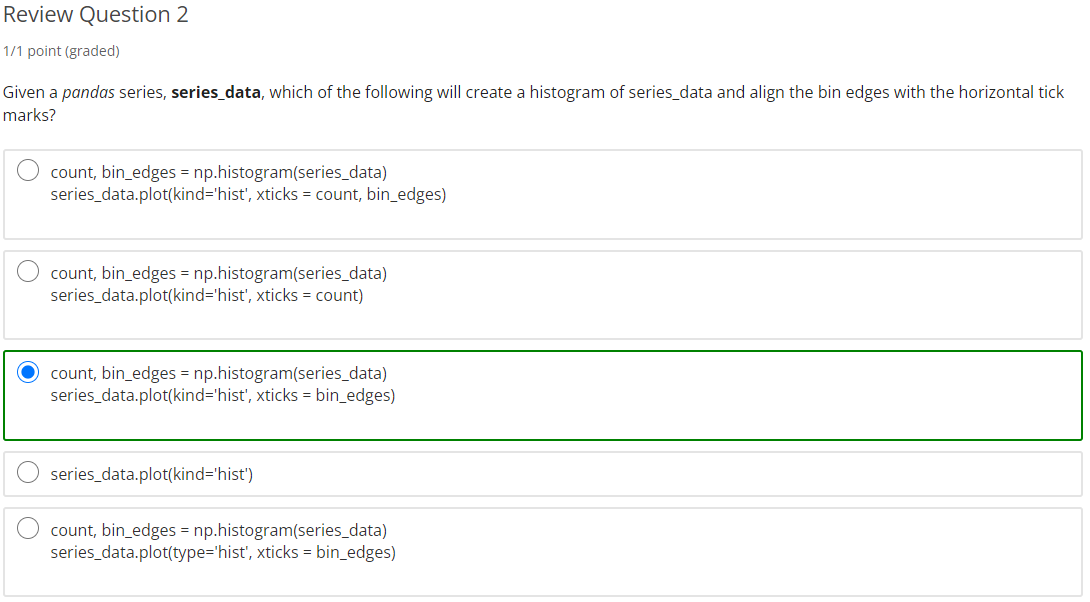

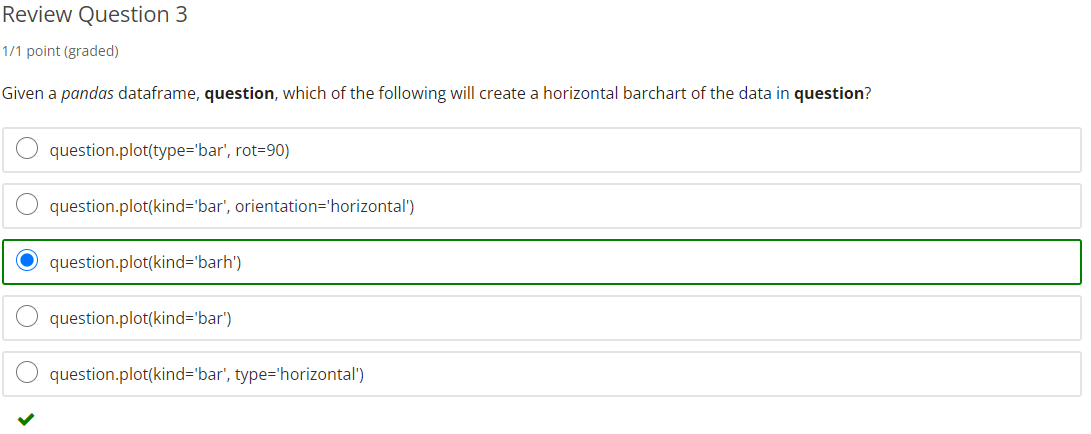

## Módulo 3 - Specialized Visualization Tools

In [ ]:
import pandas as pd
import numpy as np

#### Pie Charts (4:14)

**Gráfica de pastel.** Es un estadístico circular dividido en rebanadas para ilustrar proporciones numéricas.

In [ ]:
#Importación de datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
#Los nombres de las columnas se convierten a texto
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
#Se crea una lista que contiene los índices de los años
years=list(map(str, range(1980, 2014)))
dfc.head(3)

Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   
Albania         0     0     0     1  ...  1223   856   702   560   716   561   
Algeria        69    63    44    69  ...  3626  4807  3623  4005  5393  4752   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  56635  
Albania       539   620   603  15096  
Algeria      4325  3774  4331  65108  

[3 rows x 38 columns]

In [ ]:
continentes=df.groupby('Continent',axis=0).sum()
continentes

1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   
Oceania                           1942   1839   1675   1018    878    920   

                                  1986   1987   1988   1989  ...    2005  \
Continent                                                    ...           
Africa                            3782   7494   7552   9894  ...   27523   
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Northern America                  7074   7705   6469   6790  ...    8394   
Oceania                            904   1200   1181   1539  ...    1585   

                                   2006    2007    2008    2009    2010  \
Continent                                                                 
Africa                            29188   28284   29890   34534   40892   
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Northern America                   9613    9463   10190    8995    8142   
Oceania                            1473    1693    1834    1860    1834   

                                   2011    2012    2013    Total  
Continent                                                         
Africa                            35441   38083   38543   580405  
Asia                             146894  152218  155075  3162719  
Europe                            26778   29177   28691  1382256  
Latin America and the Caribbean   27856   27173   24950   740198  
Northern America                   7677    7892    8503   232639  
Oceania                            1548    1679    1775    53399  

[6 rows x 35 columns]

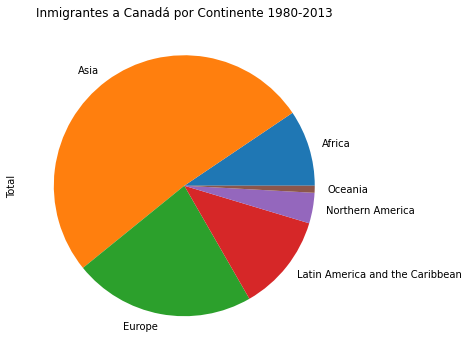

In [ ]:
import matplotlib.pyplot as plt
continentes['Total'].plot(kind='pie', figsize=(8, 6))
plt.title('Inmigrantes a Canadá por Continente 1980-2013')
plt.show()

#### Box Plots (3:42)

**Gráfica de cajas y bigotes (box plot).** Es una forma de representar estadísticamente la distribución de datos a través de cinco dimensiones principales:
- **La primera dimensión** es el mínimo, que es la número más pequeño en los datos ordenados
- **La segunda dimensión** es el primer cuartil, que es el punto 25% del camino a través de los datos ordenados. En otras palabras, un cuarta parte de los puntos de datos son menores que este valor
- **La tercera dimensión** es la mediana, que es el promedio de los datos ordenados
- **La cuarta dimensión** es el tercer cuartil, que es el punto 75% del camino a través de los datos ordenados. En otras palabras, tres cuartas partes de los puntos de datos son inferiores a este valor
- **La cuarta dimensión** es el tercer cuartil, que es el punto 75% del camino a través de los datos ordenados. En otras palabras, tres cuartas partes de los puntos de datos son inferiores a este valor
- **La quinta dimensión** es el máximo, que es el número más alto en los datos ordenados.


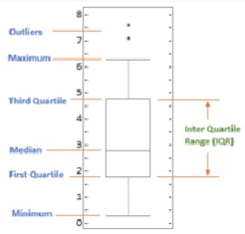

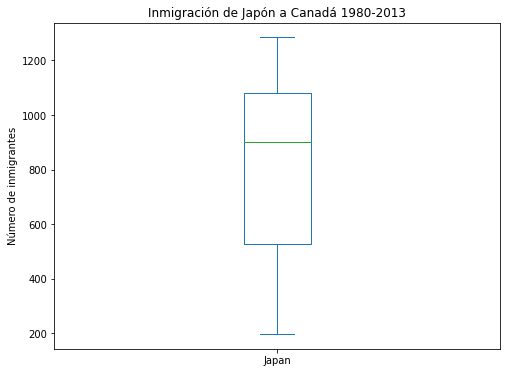

In [ ]:
import matplotlib.pyplot as plt
japon=dfc.loc[['Japan'],years].transpose()
japon.plot(kind='box', figsize=(8, 6))
plt.title('Inmigración de Japón a Canadá 1980-2013')
plt.ylabel('Número de inmigrantes')
plt.show()

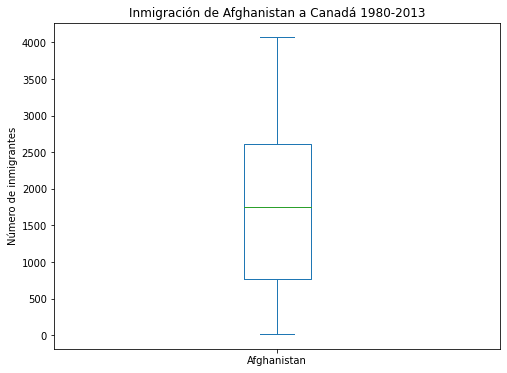

In [ ]:
Afghanistan=dfc.loc[['Afghanistan'],years].transpose()
Afghanistan.plot(kind='box', figsize=(8, 6))
plt.title('Inmigración de Afghanistan a Canadá 1980-2013')
plt.ylabel('Número de inmigrantes')
plt.show()

#### Scatter Plots (4:17)

**Gráfico de dispersión.** De forma usual, muestra valores pertenecientes a dos variables, una contra la otra. Por lo general, es una variable dependiente graficada contra una independiente para determinar si alguna existe correlación.

In [ ]:
#Se genera el df necesario
dfTotal=pd.DataFrame(dfc[years].sum(axis=0))
dfTotal.index=map(int, dfTotal.index) #years to type int (useful for regression later on)
dfTotal.reset_index(inplace=True) #reset index
dfTotal.columns=['año', 'total'] #renombrar
dfTotal.head()

año   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

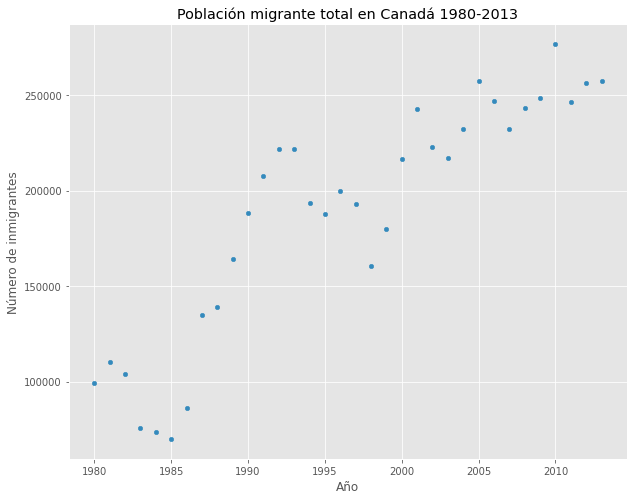

In [ ]:
#Creación del gráfico
import matplotlib as mpl
import matplotlib.pyplot as plt
dfTotal.plot(kind='scatter', x='año', y='total', figsize=(10,8))
plt.title('Población migrante total en Canadá 1980-2013')
plt.xlabel('Año')
plt.ylabel('Número de inmigrantes')
plt.show()

#### Lab - Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
#Importación de datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
#Los nombres de las columnas se convierten a texto
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
#Se crea una lista que contiene los índices de los años
years=list(map(str, range(1980, 2014)))
dfc.head(3)

Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   
Albania         0     0     0     1  ...  1223   856   702   560   716   561   
Algeria        69    63    44    69  ...  3626  4807  3623  4005  5393  4752   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  56635  
Albania       539   620   603  15096  
Algeria      4325  3774  4331  65108  

[3 rows x 38 columns]

##### Gráfico de pastel

The general process of groupby involves the following steps:

- **Split:** Splitting the data into groups based on some criteria.
- **Apply:** Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
- **Combine:** Combining the results into a data structure.

In [ ]:
df_continents=df.groupby('Continent', axis=0).sum()
print(type(df.groupby('Continent', axis=0)))
df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


1980   1981   1982   1983   1984   1985  \
Continent                                                                   
Africa                            3951   4363   3819   2671   2639   2650   
Asia                             31025  34314  30214  24696  27274  23850   
Europe                           39760  44802  42720  24638  22287  20844   
Latin America and the Caribbean  13081  15215  16769  15427  13678  15171   
Northern America                  9378  10030   9074   7100   6661   6543   

                                  1986   1987   1988   1989  ...    2005  \
Continent                                                    ...           
Africa                            3782   7494   7552   9894  ...   27523   
Asia                             28739  43203  47454  60256  ...  159253   
Europe                           24370  46698  54726  60893  ...   35955   
Latin America and the Caribbean  21179  28471  21924  25060  ...   24747   
Northern America                  7074   7705   6469   6790  ...    8394   

                                   2006    2007    2008    2009    2010  \
Continent                                                                 
Africa                            29188   28284   29890   34534   40892   
Asia                             149054  133459  139894  141434  163845   
Europe                            33053   33495   34692   35078   33425   
Latin America and the Caribbean   24676   26011   26547   26867   28818   
Northern America                   9613    9463   10190    8995    8142   

                                   2011    2012    2013    Total  
Continent                                                         
Africa                            35441   38083   38543   580405  
Asia                             146894  152218  155075  3162719  
Europe                            26778   29177   28691  1382256  
Latin America and the Caribbean   27856   27173   24950   740198  
Northern America                   7677    7892    8503   232639  

[5 rows x 35 columns]

We will pass in kind = 'pie' keyword, along with the following additional parameters:

- **autopct** is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be fmt%pct.

- **startangle** rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.

- **shadow** Draws a shadow beneath the pie (to give a 3D feel).

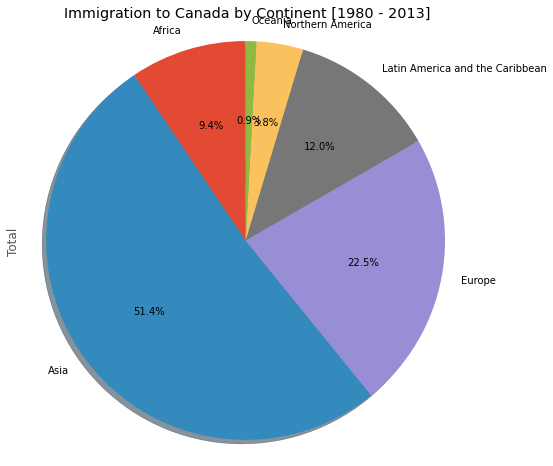

In [ ]:
df_continents['Total'].plot(kind='pie',
                            figsize=(8, 8),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

To improve the visuals:

- Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().

- Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.

- Pass in a custom set of colors for continents by passing in colors parameter.

- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in explode parameter.

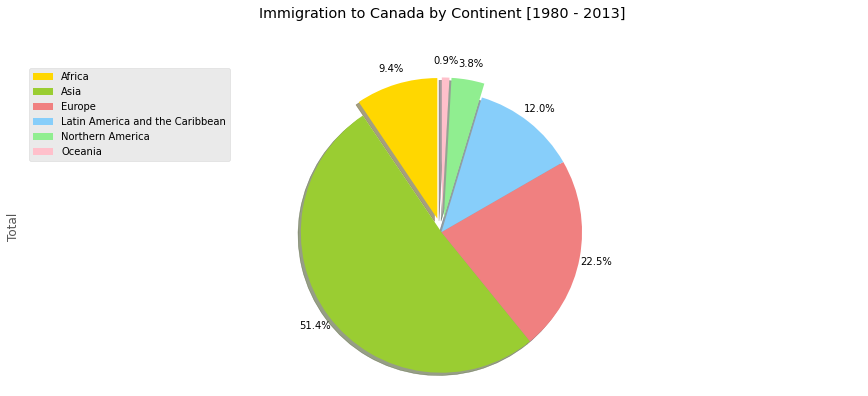

In [ ]:
colors_list=['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list=[0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%',
                            startangle=90,
                            shadow=True,
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) # scale the title up by 12% to match pctdistance
plt.axis('equal')
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

Note: You might need to play with the explore values in order to fix any overlapping slice values.

##### Gráfico de cajas y bigotes

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

- **Minimum:** The smallest number in the dataset excluding the outliers.
- **First quartile:** Middle number between the minimum and the median.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between median and maximum.
- **Maximum:** The largest number in the dataset excluding the outliers.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

Step 1: Get the dataset for China and India and call the dataframe df_CI.

In [ ]:
df_CI=dfc.loc[['India','China'], years].transpose()
df_CI.head()

Country  India  China
1980      8880   5123
1981      8670   6682
1982      8147   3308
1983      7338   1863
1984      5704   1527

Let's view the percentiles associated with both countries using the describe() method.

In [ ]:
df_CI.describe()

Country         India         China
count       34.000000     34.000000
mean     20350.117647  19410.647059
std      10007.342579  13568.230790
min       4211.000000   1527.000000
25%      10637.750000   5512.750000
50%      20235.000000  19945.000000
75%      28699.500000  31568.500000
max      36210.000000  42584.000000

Step 2: Plot data

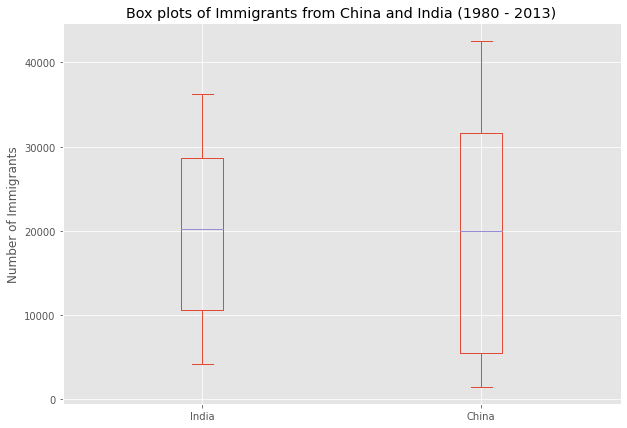

In [ ]:
df_CI.plot(kind='box', figsize=(10, 7))
plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.show()

If you prefer to create horizontal box plots, you can pass the vert parameter in the plot function and assign it to False. You can also specify a different color in case you are not a big fan of the default red color.

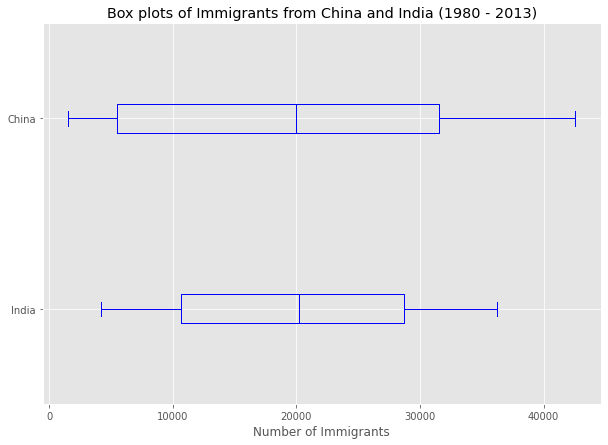

In [ ]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe df_top15.

In [ ]:
df_top15=dfc.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

Continent  \
Country                                                                               
India                                                                          Asia   
China                                                                          Asia   
United Kingdom of Great Britain and Northern Ir...                           Europe   
Philippines                                                                    Asia   
United States of America                                           Northern America   
Pakistan                                                                       Asia   
Iran (Islamic Republic of)                                                     Asia   
Sri Lanka                                                                      Asia   
Poland                                                                       Europe   
Republic of Korea                                                              Asia   
Lebanon                                                                        Asia   
Jamaica                                             Latin America and the Caribbean   
France                                                                       Europe   
Viet Nam                                                                       Asia   
Romania                                                                      Europe   

                                                                Region  \
Country                                                                  
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
United States of America                              Northern America   
Pakistan                                                 Southern Asia   
Iran (Islamic Republic of)                               Southern Asia   
Sri Lanka                                                Southern Asia   
Poland                                                  Eastern Europe   
Republic of Korea                                         Eastern Asia   
Lebanon                                                   Western Asia   
Jamaica                                                      Caribbean   
France                                                  Western Europe   
Viet Nam                                            South-Eastern Asia   
Romania                                                 Eastern Europe   

                                                               DevName   1980  \
Country                                                                         
India                                               Developing regions   8880   
China                                               Developing regions   5123   
United Kingdom of Great Britain and Northern Ir...   Developed regions  22045   
Philippines                                         Developing regions   6051   
United States of America                             Developed regions   9378   
Pakistan                                            Developing regions    978   
Iran (Islamic Republic of)                          Developing regions   1172   
Sri Lanka                                           Developing regions    185   
Poland                                               Developed regions    863   
Republic of Korea                                   Developing regions   1011   
Lebanon                                             Developing regions   1409   
Jamaica                                             Developing regions   3198   
France                                               Developed regions   1729   
Viet Nam                                            Developing regions   1191   
Romania                                

Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

- Create a list of all years in decades 80's, 90's, and 00's.
- Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
- Merge the three series into a new data frame.

Call your dataframe new_df.

In [ ]:
years_80s = list(map(str, range(1980, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:, years_90s].sum(axis=1)
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

dfNew = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})
dfNew.head()

1980s   1990s   2000s
Country                                                                   
India                                                82154  180395  303591
China                                                32003  161528  340385
United Kingdom of Great Britain and Northern Ir...  179171  261966   83413
Philippines                                          60764  138482  172904
United States of America                             76824   56915   75173

Let's learn more about the statistics associated with the dataframe using the describe() method.

In [ ]:
dfNew.describe()

1980s          1990s          2000s
count      15.000000      15.000000      15.000000
mean    44418.333333   85594.666667   97471.533333
std     44190.676455   68237.560246  100583.204205
min      7613.000000   30028.000000   13629.000000
25%     16698.000000   39259.000000   36101.500000
50%     30638.000000   56915.000000   65794.000000
75%     59183.000000  104451.500000  105505.500000
max    179171.000000  261966.000000  340385.000000

Step 3: Plot the box plots.

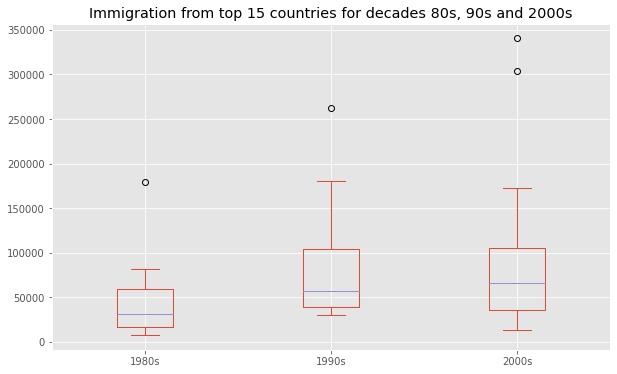

In [ ]:
dfNew.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 * 69,404)

Outlier > 209,611.5

In [ ]:
dfNew=dfNew.reset_index()
dfNew[dfNew['2000s']> 209611.5]

Country  1980s   1990s   2000s
0   India  82154  180395  303591
1   China  32003  161528  340385

##### Subplots

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

Typical syntax is :
```
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

- nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
plot_number is used to identify the particular subplot that this function is to create within the notional grid.
- plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.

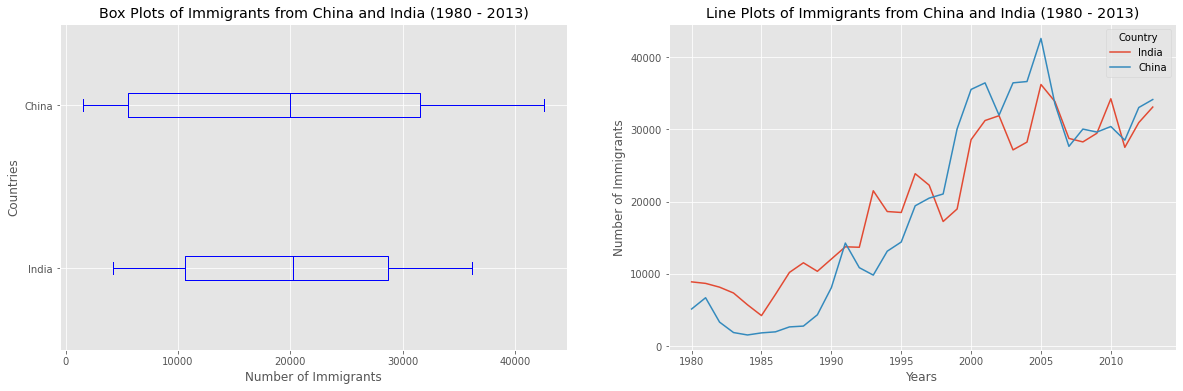

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

##### Scatter Plots

In [ ]:
df_tot=pd.DataFrame(dfc[years].sum(axis=0))
df_tot.index=map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns=['year', 'total']
df_tot.head()

year   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

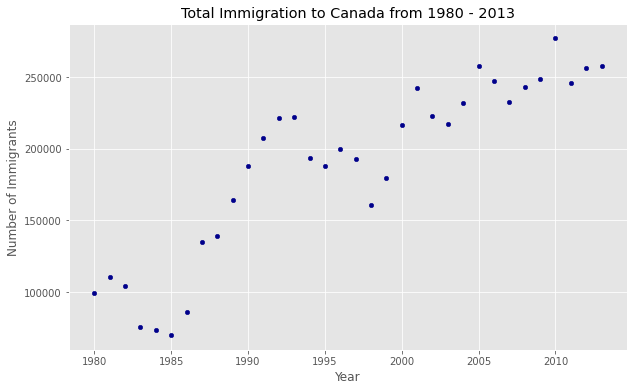

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.show()

So let's try to plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:

- **x:** x-coordinates of the data
- **y:** y-coordinates of the data
- **deg:** Degree of fitting polynomial (1 = linear, 2 = quadratic, and so on)

In [ ]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

print('Ajuste en x:',fit[0], '\nAjuste en y:',fit[1])

Ajuste en x: 5567.092284186348 
Ajuste en y: -10926195.245378044


The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a * x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the scatter plot.

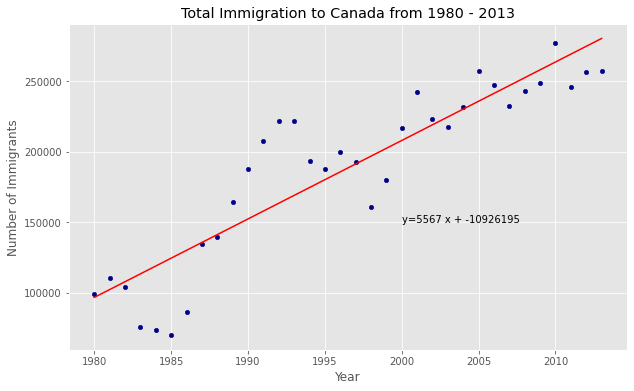

'No. Immigrants = 5567 * Year + -10926195'

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])

**Question:** Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:

- Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
- Sum the immigration numbers across all three countries for each year and turn the result into a dataframe.
- Name this new dataframe df_total.
- Reset the index in place.
- Rename the columns to year and total.
- Display the resulting dataframe.

In [ ]:
df_countries=dfc.loc[['Denmark','Norway','Sweden'], years].transpose()
df_total=pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace = True)
df_total.columns=['year', 'total']
df_total.head()

year  total
0  1980    669
1  1981    678
2  1982    627
3  1983    333
4  1984    252

Step 2: Generate the scatter plot by plotting the total versus year in df_total.

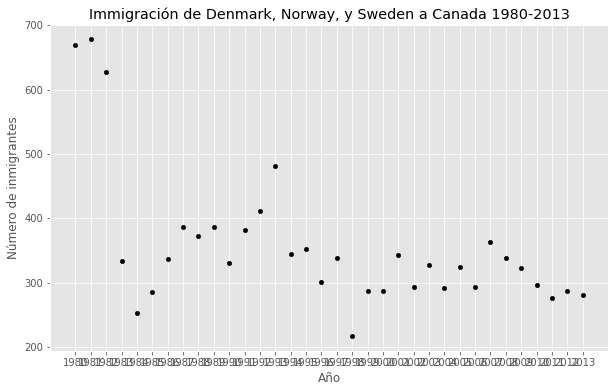

In [ ]:
df_total.plot(kind='scatter',x='year',y='total',figsize=(10, 6),color='black')
plt.title('Immigración de Denmark, Norway, y Sweden a Canada 1980-2013')
plt.xlabel('Año')
plt.ylabel('Número de inmigrantes')
plt.show()

#####Bubble Plots

**Gráfico de burbujas.** Es una variación de la gráfica de dispersión, que muestra tres dimensiones de datos (x, y, z). Los puntos de datos se reemplazan con burbujas y su tamaño está determinado por z, conocido como peso. En maplotlib, podemos pasar un arreglo o escalar al parámetro s para plot(), que contiene el peso de cada punto.

Step 1: Get the data for Brazil and Argentina. Like in the previous example, we will convert the Years to type int and include it in the dataframe.

In [ ]:
df_t=dfc[years].transpose()
df_t.index=map(int, df_t.index) #cast the Years (the index) to type int
#label the index. This will automatically be the column name when we reset the index
df_t.index.name='Year'
df_t.reset_index(inplace=True) #reset index to bring the Year in as a column
df_t.head()

Country  Year  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
0        1980           16        1       80               0        0       1   
1        1981           39        0       67               1        0       3   
2        1982           39        0       71               0        0       6   
3        1983           47        0       69               0        0       6   
4        1984           71        0       63               0        0       4   

Country  Antigua and Barbuda  Argentina  Armenia  ...  \
0                          0        368        0  ...   
1                          0        426        0  ...   
2                          0        626        0  ...   
3                          0        241        0  ...   
4                         42        237        0  ...   

Country  United States of America  Uruguay  Uzbekistan  Vanuatu  \
0                            9378      128           0        0   
1                           10030      132           0        0   
2                            9074      146           0        0   
3                            7100      105           0        0   
4                            6661       90           0        0   

Country  Venezuela (Bolivarian Republic of)  Viet Nam  Western Sahara  Yemen  \
0                                       103      1191               0      1   
1                                       117      1829               0      2   
2                                       174      2162               0      1   
3                                       124      3404               0      6   
4                                       142      7583               0      0   

Country  Zambia  Zimbabwe  
0            11        72  
1            17       114  
2            11       102  
3             7        44  
4            16        32  

[5 rows x 196 columns]

Step 2: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use feature scaling to bring all values into the range [0, 1]. The general formula is:

***x normalizado = (x original - x mínimo) / (x máximo - x mínimo)***

 The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.

In [ ]:
### type your answer here
# normalized Chinese data
norm_china = (df_t['China'] - df_t['China'].min()) / (df_t['China'].max() - df_t['China'].min())
# normalized Indian data
norm_india = (df_t['India'] - df_t['India'].min()) / (df_t['India'].max() - df_t['India'].min())

Step 2: Generate the bubble plots.

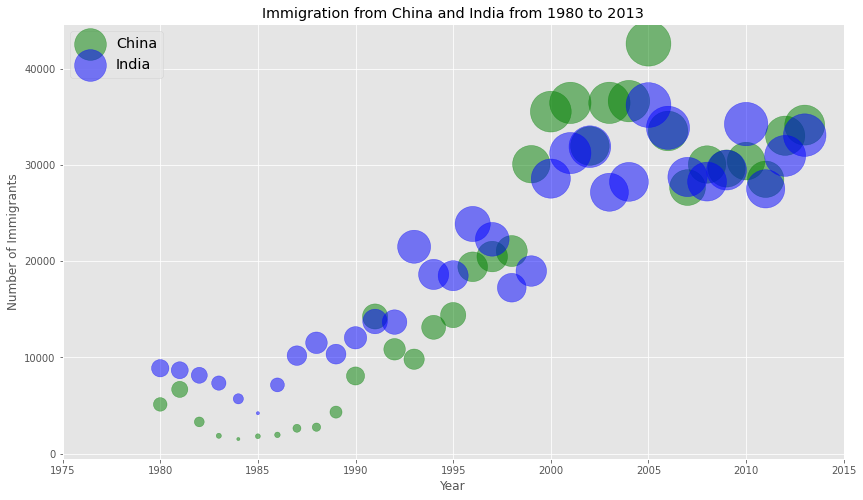

In [ ]:
### type your answer here
#China
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights
                    xlim=(1975, 2015)
                    )

#India
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 to 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

## Módulo 4 - Advanced Visualization Tools

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

#Importamos los datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.set_index('Country', inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
#Los nombres de las columnas se convierten a texto
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
#Se crea una lista que contiene los índices de los años
years=list(map(str, range(1980, 2014)))

Matplotlib version:  3.2.2


#### Waffle Charts (1:28)

**Gráfico de gofres.** Permite visualizar los datos en relación con un todo o para resaltar el progreso contra un umbral. Sin embargo, Matplotlib no tiene una función construida para crearlo.

In [ ]:
#Creamos un nuevo df con los datos que visualizaremos en forma de gofre
dfw=df.loc[['Denmark', 'Norway', 'Sweden'], :]

#Paso 1. El primer paso para crear un gráfico waffle es determinar la proporción de cada categoría con respecto al total.Paso 1. El primer paso para crear un gráfico waffle es determinar la proporción de cada categoría con respecto al total
totales=dfw['Total'].sum()
proporcion=dfw['Total']/totales

#Observamos las proporciones
pd.DataFrame({"Category Proportion": proporcion})

Category Proportion
Country                     
Denmark             0.323345
Norway              0.191976
Sweden              0.484679

In [ ]:
#Step 2. The second step is defining the overall size of the waffle chart
ancho=40
alto=10
totalBits=ancho*alto #total number of tiles

print(f'Total number of tiles is {totalBits}.')

Total number of tiles is 400.


In [ ]:
#Step 3. The third step is using the proportion of each category to determe it respective number of tiles
bit_cat=(proporcion*totalBits).round().astype(int)
pd.DataFrame({"Number of tiles": bit_cat})

Number of tiles
Country                 
Denmark              129
Norway                77
Sweden               194

In [ ]:
#Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it
waffle_chart=np.zeros((alto, ancho), dtype=np.uint) #Inicialización gráfico

#define indices to loop through waffle chart
category_index=0
tile_index=0

#populate the waffle chart
for col in range(ancho):
    for row in range(alto):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(bit_cat[0:category_index]):
            # ...proceed to the next category
            category_index += 1

        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index

print('Waffle chart populated!')
print('')
waffle_chart

Waffle chart populated!



array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 432x288 with 0 Axes>

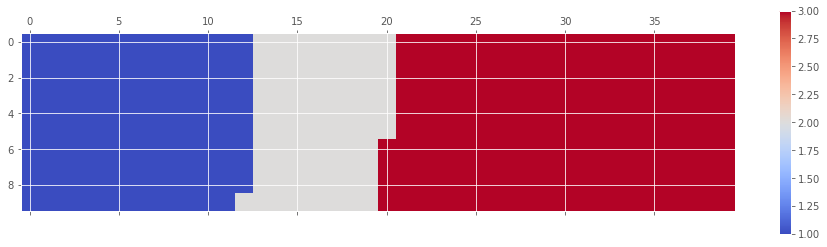

In [ ]:
#Step 5. Map the waffle chart matrix into a visual
fig=plt.figure() #instantiate a new figure object

#use matshow to display the waffle chart
colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

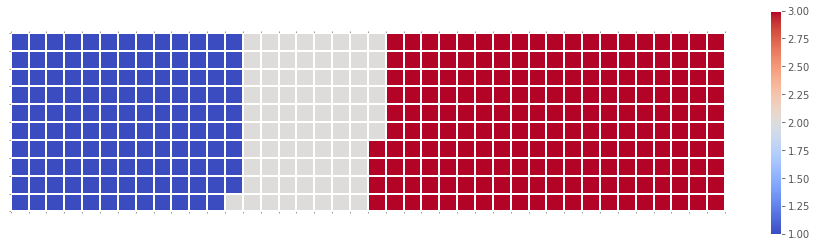

In [ ]:
#Step 6. Prettify the chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (ancho), 1), minor=True)
ax.set_yticks(np.arange(-.5, (alto), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 432x288 with 0 Axes>

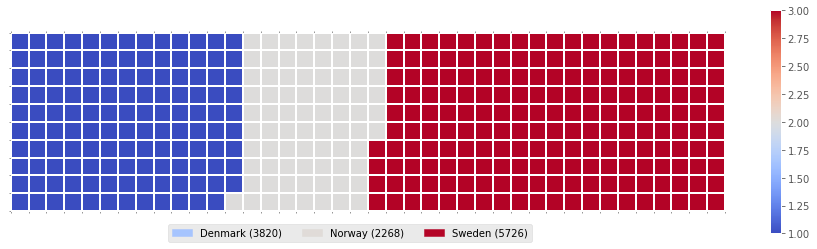

In [ ]:
#Step 7. Create a legend and add it to chart
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (ancho), 1), minor=True)
ax.set_yticks(np.arange(-.5, (alto), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum=np.cumsum(dfw['Total'])
total_values=values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles=[]
for i, category in enumerate(dfw.index.values):
    label_str=category + ' (' + str(dfw['Total'][i]) + ')'
    color_val=colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(dfw.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

#### Word Clouds (1:28)

**Nube de palabras.** Representación de la importancia de las diferentes palabras en el cuerpo de un texto. Cuanto más aparece una palabra particular en una fuente de datos (de texto), más grande y más pronunciada aparece en la nube mundial.

Incluso sin saber nada sobre el texto que se está analizando, la nube de palabras nos puede ayudar a contextualizar los datos. De nuevo, Matplolib no tiene una función construida para generar este tipo de gráficos.

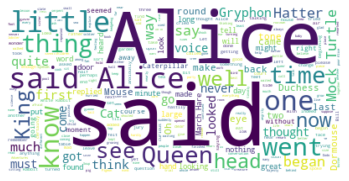

In [ ]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

import urllib
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

stopwords=set(STOPWORDS)

alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords) #instantiate a word cloud object

alice_wc.generate(alice_novel) #generate the word cloud

plt.imshow(alice_wc, interpolation='bilinear') #display the word cloud
plt.axis('off')
plt.show()

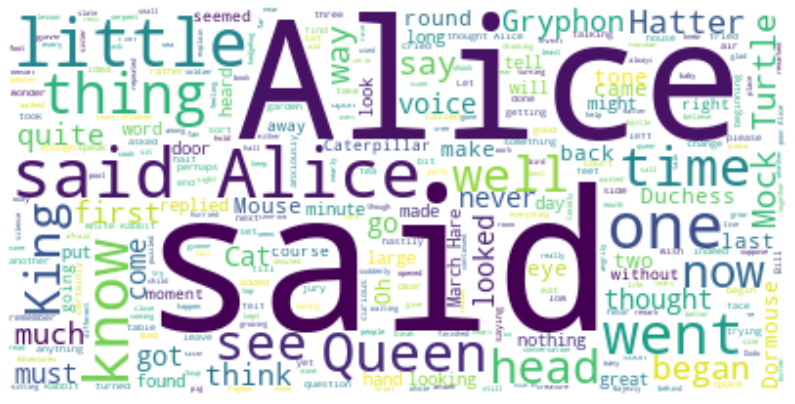

In [ ]:
#Cambiando el tamaño de la figura
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

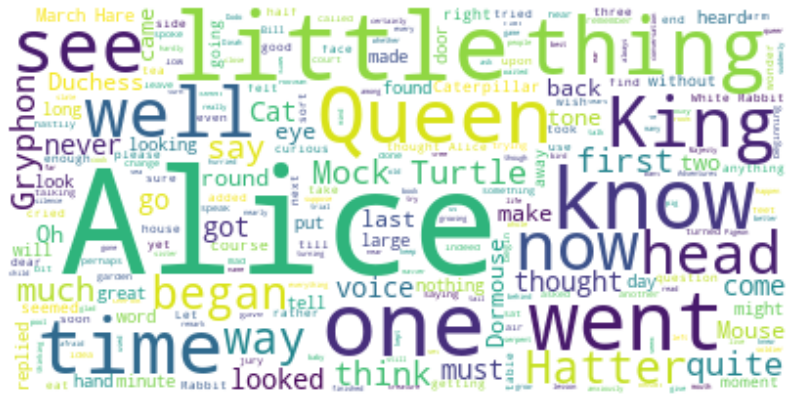

In [ ]:
stopwords.add('said') #add the words said to stopwords

#re-generate the word cloud
alice_wc.generate(alice_novel)

#display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#save mask to alice_mask
from PIL import Image
alice_mask=np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

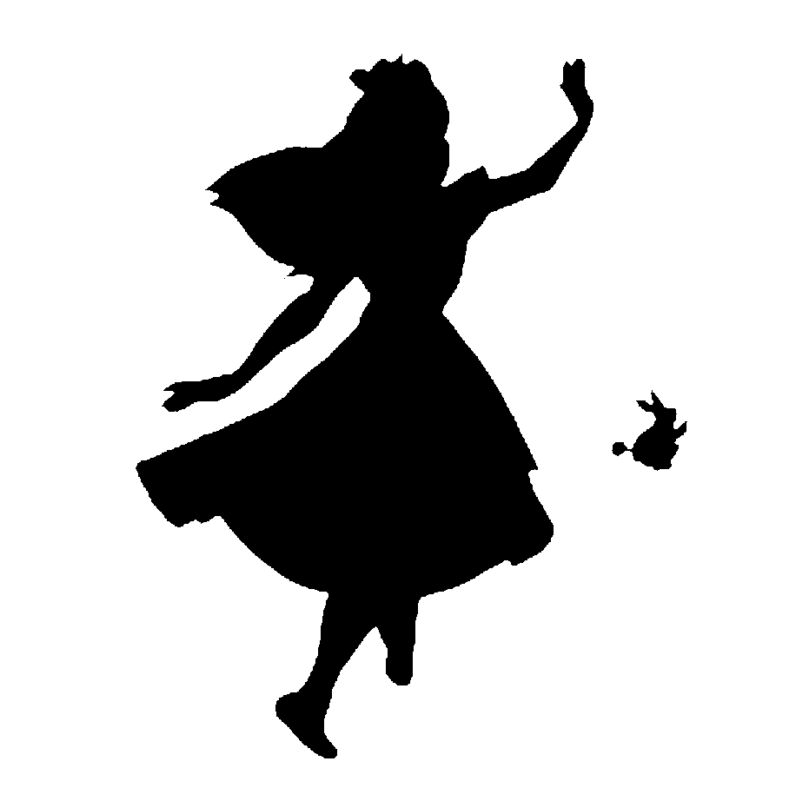

In [ ]:
fig=plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

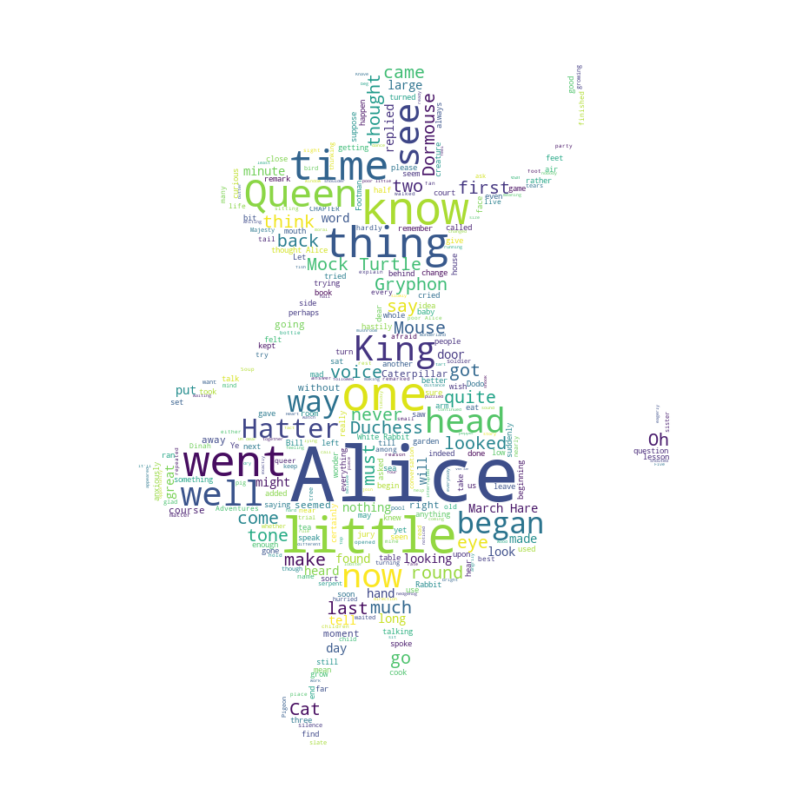

In [ ]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Seaborn and Regression Plots (2:26)

**Seaborn.** Es otra librería de visualización en python, basada en Matplotlib. Fue construida principalmente para proporcionar una interfaz de alto nivel para crear gráficos estadísticos atractivos.

Por otro lado, Seaborn hace que la creación de gráficas sea muy eficiente, pues con un código 5 veces menor que con Matplotlib, se puede obtener el mismo resultado.

In [ ]:
#Df entre los años y el total
df4=pd.DataFrame(dfc[years].sum(axis=0))
df4.index=map(int, df4.index)
df4.reset_index(inplace=True)
df4.columns=['año', 'total']
df4.head()

año   total
0  1980   99137
1  1981  110563
2  1982  104271
3  1983   75550
4  1984   73417

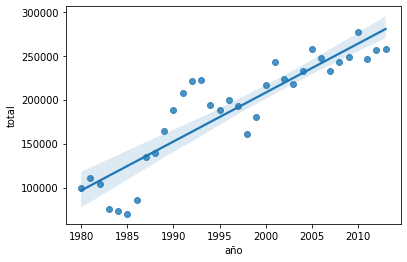

In [ ]:
#Importamos la librería
import seaborn as sns

#Llamamos la función regplot
ax=sns.regplot(x='año',y='total',data=df4)

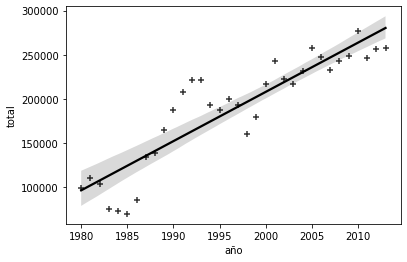

In [ ]:
#Personalizando la gráfica
ax=sns.regplot(x='año',y='total',data=df4,
               color='black',
               marker='+')

#### Lab - Waffle Charts, Word Clouds, and Regression Plots

##### Gráfico de gofre

In [ ]:
#Creando una función para generar la gráfica

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (dfw.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center',
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

In [ ]:
width = 40 # width of chart
height = 10 # height of chart

categories = dfw.index.values # categories
values = dfw['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

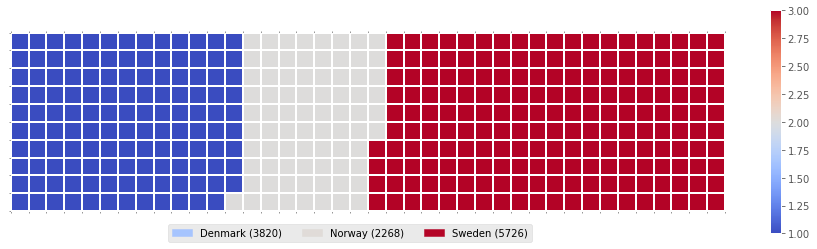

In [ ]:
#Utilizando la función para generar la gráfica
create_waffle_chart(categories, values, height, width, colormap)

##### Gráfico de nube

In [ ]:
total_immigration=dfc['Total'].sum()
total_immigration

6151616

In [ ]:
max_words=90
word_string=''
for country in dfc.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times=int(dfc.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania '

In [ ]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


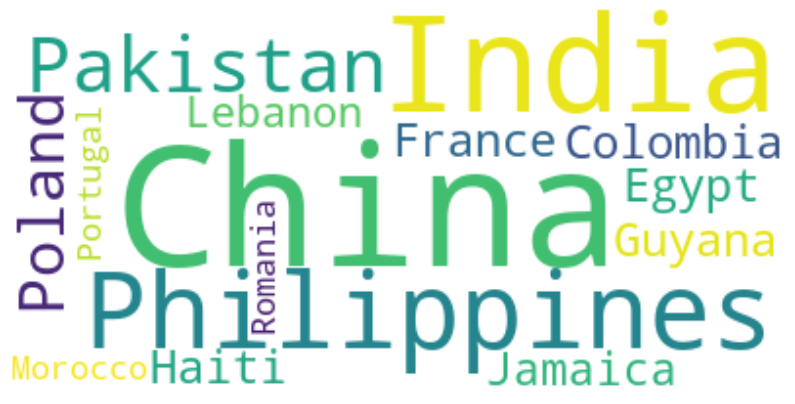

In [ ]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Gráfico de regresión

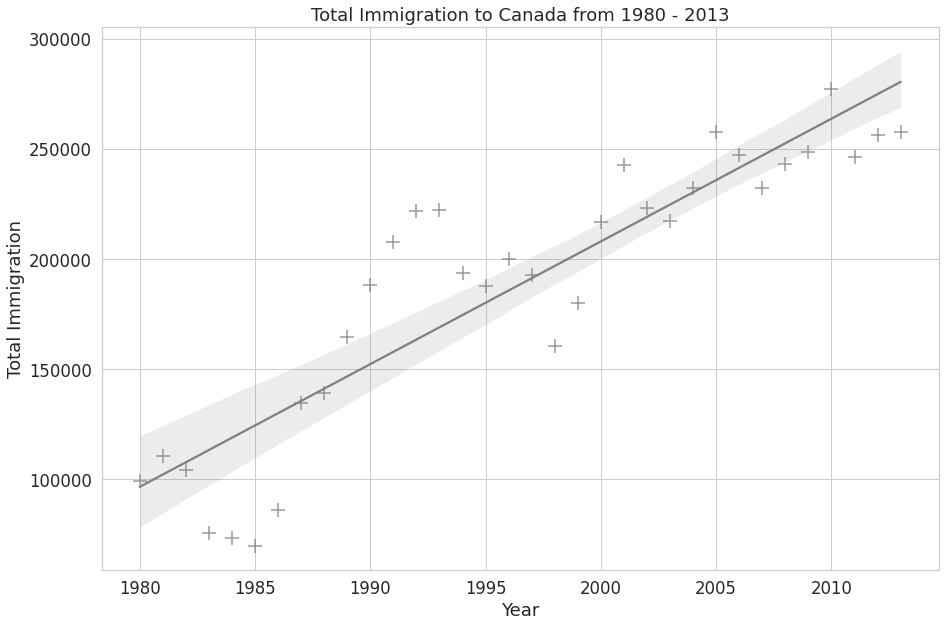

In [ ]:
#Librería
import seaborn as sns

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='año',
                 y='total',
                 data=df4,
                 color='gray',
                 marker='+',
                 scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

**Question:** Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

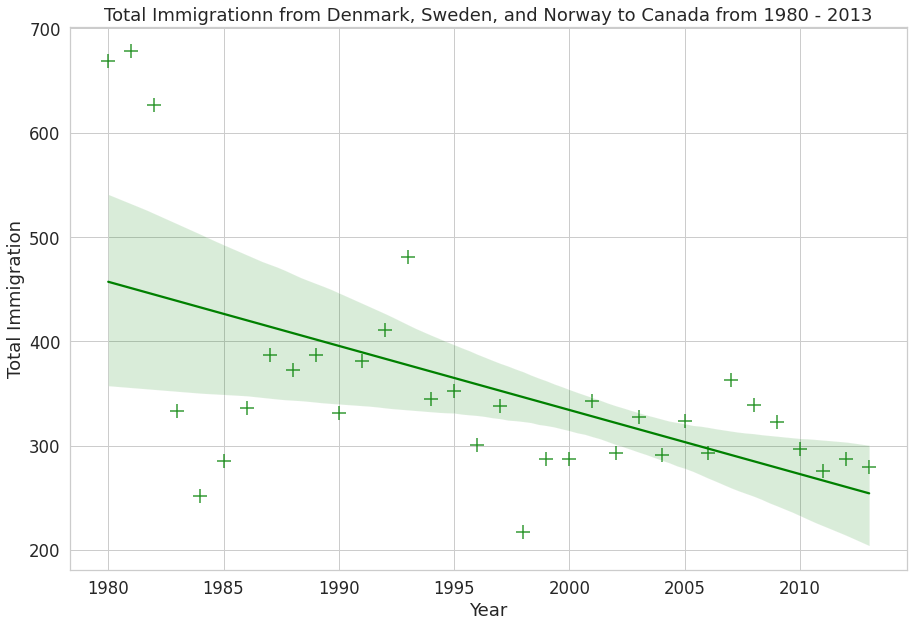

In [ ]:
df_countries=dfc.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_total=pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns=['year', 'total']
df_total['year']=df_total['year'].astype(int)
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

## Módulo 5 - Creating Maps and Visualizing Geospatial Data

#### Introduction to Folium (2:35)

**Folium.** Es una librería de visualización en Python, creada representar datos geoespaciales. Es posible generar un mapa de cualquier lugar del mundo con solo conocer los valores de latitud y longitud (cuyo mapa es interactivo), como también superponer marcadores y grupos de ellos. Es posible personalizar el estilo de visualización para recalcar distintos ámbitos en las regiones y ajustar el nivel de zoom.

In [ ]:
#Importamos la librería
import folium

#Definimos el mapa del mundo
worldMap=folium.Map()

#Mostramos el mapa
worldMap

In [ ]:
#Crear un mapa dada una determinada latitud y longitud
latlongMap=folium.Map(location=[20,-110],zoom_start=5)
latlongMap

In [ ]:
#Crear un mapa dada una determinada latitud y longitud con estilo
#Es ideal para visualizar y explorar los meandros de los ríos y zonas costeras
latlongMap=folium.Map(location=[20,-110],zoom_start=5,tiles='Stamen Toner')
latlongMap

In [ ]:
#Crear un mapa dada una determinada latitud y longitud con estilo
#Es ideal para visualizar el sombreado de colinas y colores naturales de la vegetación
latlongMap=folium.Map(location=[20,-110],zoom_start=5,tiles='Stamen Terrain')
latlongMap

#### Maps with Markers (2:21)

In [ ]:
#Genemos un mapa de México
MexMap=folium.Map(location=[22,-100],zoom_start=5,tiles='Stamen Terrain')

#--Añadir un marcador rojo en la Ciudad de México--
#Creamos un grupo de características (feature group)
cdmx=folium.map.FeatureGroup()

#Estilo del grupo de características
cdmx.add_child(folium.features.CircleMarker([19,-99],
                                            radius=4,
                                            color='red',
                                            fill_color='Red'))

#Añadir el grupo de características al mapa
MexMap.add_child(cdmx)

#Etiquetar el marcador
folium.Marker([19,-99], popup='CDMX').add_to(MexMap)

#Mostrar el mapa
MexMap

#### Choropleth Maps (4:21)

**Mapa de coropletas.** Es un mapa temático en el que las áreas están sombreadas o con patrón en proporción a la medición de la variable estadística que se muestra, como la densidad de población o el ingreso per cápita. Cuanto mayor sea la medida, más oscuro será el color.

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import folium

#Importamos los datos
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx'
nombre='Canada by Citizenship'
df=pd.read_excel(path, sheet_name=nombre, skiprows=range(20), skipfooter=2)
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
idx1980=df.columns.get_loc(1980)
df['Total']=df.iloc[:,idx1980:-1].sum(axis=1)
#Los nombres de las columnas se convierten a texto
dfc=df.copy()
dfc.columns=list(map(str, df.columns))
#Se crea una lista que contiene los índices de los años
years=list(map(str, range(1980, 2014)))

df.head(2)

Country Continent           Region             DevName  1980  1981  \
0  Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1      Albania    Europe  Southern Europe   Developed regions     1     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   

   2012  2013  Total  
0  2635  2004  56635  
1   620   603  15096  

[2 rows x 39 columns]

In [ ]:
#Archivo json
json_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/world_countries.json'

mapaMundo=folium.Map(zoom_start=2,tiles='cartodb positron')
mapaMundo.choropleth(geo_data=json_path,
                     data=dfc,
                     columns=['Country','Total'],
                     key_on='feature.properties.name',
                     fill_color='YlOrRd',
                     fill_opacity=0.7,
                     line_opacity=0.2,
                     legend_name='Immigración a Canadá')
mapaMundo

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Lab - Generating Maps in Python

In [ ]:
#Datos sobre incidentes del departamento de policía
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv'
incidentes=pd.read_csv(path)
incidentes.head(2)

IncidntNum     Category                                        Descript  \
0   120058272  WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272  WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   

  DayOfWeek                    Date   Time PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00   SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00   SOUTHERN  ARREST, BOOKED   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   

                               Location            PdId  
0  (37.775420706711, -122.403404791479)  12005827212120  
1  (37.775420706711, -122.403404791479)  12005827212168

In [ ]:
#Ubicación de San Francisco
latitud=37.77
longitud=-122.42

#Mapa de San Francisco
mapSF=folium.Map(location=[latitud,longitud],zoom_start=12)
mapSF

In [ ]:
#Se obtienen solo los primeros 100 crímenes
incidentesDF=incidentes.iloc[0:100, :]

#Inicialización de grupo de instancias para indentificas los incidentes
incidentesGroup=folium.map.FeatureGroup()

#Búcle para añadir los 100 marcadores para los 100 indicidentes
for lat, long in zip(incidentesDF.Y, incidentesDF.X):
  incidentesGroup.add_child(folium.features.CircleMarker([lat,long],
                                                         radius=4,
                                                         color='red',
                                                         fill=True,
                                                         fill_color='blue',
                                                         fill_opacity=0.6))
mapSF.add_child(incidentesGroup)

In [ ]:
#Proceso anterior para generar el mapa
incidentesGroup=folium.map.FeatureGroup()

for lat, long in zip(incidentesDF.Y, incidentesDF.X):
  incidentesGroup.add_child(folium.features.CircleMarker([lat,long],
                                                         radius=4,
                                                         color='red',
                                                         fill=True,
                                                         fill_color='blue',
                                                         fill_opacity=0.6))
mapSF.add_child(incidentesGroup)

#Añadir marcadores y etiquetas al mapa
latitudes=list(incidentesDF.Y)
longitudes=list(incidentesDF.X)
etiquetas=list(incidentesDF.Category)

for lat, long, label in zip(latitudes, longitudes, etiquetas):
  folium.Marker([lat,long],popup=label).add_to(mapSF)
mapSF.add_child(incidentesGroup)
mapSF